<a href="https://colab.research.google.com/github/vanderbilt-ml/51-white-mlproj-stackoverflow/blob/main/stackoverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

The Stack Overflow Developer Survey (https://insights.stackoverflow.com/survey/2021) is an annual Questionaire which seeks to best understand the users of the popular Q&A board/site. The survey gathers demographics on developers including age, region, years experience, education, salary, favorite/used technologies. I have been participating in this survey for around the last 6 or 7 years as both a professional software developer and ethusiast. I like to keep up to date on what the latest technology trends are and this survey has been one of many sources reviewed.

Survey questions have changed overtime as a reflection of tracking different trends, but some key questions are consistent. This project consists of analyzing response results from years 2011-2021.

https://www.kaggle.com/datasets/satoshidatamoto/stack-overflow-developer-survey-findings-and-mete

# Project Description

The goal of this project is to build a predictor for technology trends over time as identified by the questionaire. This will involve analyzing similar questions and responses over the different years. An additional goal is identifying relationships between question responses. There are all sorts of Bayesian and conditional probability questions which can be asked such as "If a developer loves Rust are they more likely to know/use React or Angular as a front-end framework?" or "If a developer has a PhD, were they more likely to have started coding at a younger age?", and if the survey answers are useful to predict education level based on other question respsonses.

In other words, given some arbitrary responses to some questions on the survey, how well can you predict responses to other questions, and which questions.

To summarize, the aim is to identify different patterns in responses both over time, and to find correlations between repsonses to build predictive models by determining which questions inform others.


# Performance Metric

Regardless of whether the end model is "90% successful at predicting a developer's "most loved programming language", there is a goal to identify which question responses influence others, by how much, and comparitively which questions are the 'most predictable'.

I anticipate identifying some responses which are highly informative of others, exceeding some threshold of predictability, and others which cannot be accurately formulated out of responses from other questions.


# Obtaining Data

https://www.kaggle.com/datasets/satoshidatamoto/stack-overflow-developer-survey-findings-and-mete

Developer Survey Results were shared on Kaggle platform, which included years 2011-2021.

Some file names were inconsistent, so upon saving the resulting zip, files were renamed to consistent reflect a common name + year.
For example: {YEAR}-survey_results_public.csv

# Imports
Handle standard imports for general data wrangling and ML

In [114]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

define Seaborn color palette to use

In [115]:
colors = sns.color_palette('pastel')[0:5]

# Access raw csv data in Colab

## Optionally use the File Uploader utility


In [116]:

# from google.colab import files
# uploaded = files.upload()

# Loading Data Frame from raw source csv data

In [117]:
df = pd.read_csv('2021-survey_results_public.csv')

# Exploratory Data Analysis


print some top results

In [118]:
df.head()

,index,Unnamed: 0,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,0,1,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,1,2,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,2,3,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,3,4,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,4,5,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


Check out list of all columns/headers

In [119]:
for col in df.columns:
  print(col)

index
Unnamed: 0
ResponseId
MainBranch
Employment
Country
EdLevel
Age1stCode
LearnCode
YearsCode
YearsCodePro
DevType
OrgSize
Currency
CompTotal
CompFreq
LanguageHaveWorkedWith
LanguageWantToWorkWith
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
PlatformHaveWorkedWith
PlatformWantToWorkWith
WebframeHaveWorkedWith
WebframeWantToWorkWith
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
OpSys
NEWStuck
NEWSOSites
SOVisitFreq
SOAccount
SOPartFreq
SOComm
NEWOtherComms
Age
Gender
Trans
Sexuality
Ethnicity
Accessibility
MentalHealth
SurveyLength
SurveyEase
ConvertedCompYearly


start to break out sub-dataframes from over-arching set

In [120]:
ed_df =df[['Country','EdLevel','LanguageHaveWorkedWith','WebframeHaveWorkedWith','DatabaseHaveWorkedWith', 'ConvertedCompYearly']]
ed_df.head()

,Country,EdLevel,LanguageHaveWorkedWith,WebframeHaveWorkedWith,DatabaseHaveWorkedWith,ConvertedCompYearly
0,Slovakia,"Secondary school (e.g. American high school, G...",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Laravel;Symfony,PostgreSQL;SQLite,62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",JavaScript;Python,Angular;Flask;Vue.js,PostgreSQL,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Assembly;C;Python;R;Rust,Flask,SQLite,NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",JavaScript;TypeScript,Angular;jQuery,NaN,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Bash/Shell;HTML/CSS;Python;SQL,Flask,Elasticsearch;PostgreSQL;Redis,NaN


## Languages Have

 Parsing the Languages Want To Work With from List into Unique Values

In [121]:
lang_series = df['LanguageHaveWorkedWith']
lang_series.head()

0    C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                JavaScript;Python
2                         Assembly;C;Python;R;Rust
3                            JavaScript;TypeScript
4                   Bash/Shell;HTML/CSS;Python;SQL
Name: LanguageHaveWorkedWith, dtype: object

In [122]:
lang_lists =lang_series.str.split(pat=';')
flat_lang_lists = lang_lists.apply(pd.Series).stack().reset_index(drop=True)

In [123]:
flat_lang_lists.value_counts()

JavaScript     53587
HTML/CSS       46259
Python         39792
SQL            38835
Java           29162
Node.js        27975
TypeScript     24909
C#             22984
Bash/Shell     22385
C++            20057
PHP            18130
C              17329
PowerShell      8871
Go              7879
Kotlin          6866
Rust            5799
Ruby            5569
Dart            4965
Assembly        4632
Swift           4204
R               4185
VBA             3847
Matlab          3846
Groovy          2479
Objective-C     2310
Scala           2148
Perl            2028
Haskell         1749
Delphi          1731
Clojure         1552
Elixir          1438
LISP            1096
Julia           1068
F#               804
Erlang           651
APL              536
Crystal          466
COBOL            437
dtype: int64

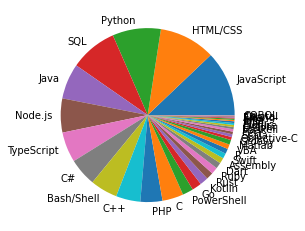

In [124]:
plt.pie(flat_lang_lists.value_counts(), labels = flat_lang_lists.value_counts().index)
plt.show()

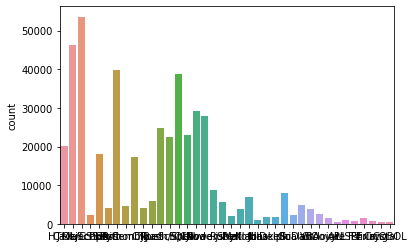

In [125]:
sns.countplot(x=flat_lang_lists)

## Languages Want

In [126]:
want_series = df['LanguageWantToWorkWith']
want_series.head()

0                             Swift
1                               NaN
2                 Julia;Python;Rust
3             JavaScript;TypeScript
4    Bash/Shell;HTML/CSS;Python;SQL
Name: LanguageWantToWorkWith, dtype: object

In [127]:
want_lists = want_series.str.split(pat=';')
flat_want_lists = want_lists.apply(pd.Series).stack().reset_index(drop=True)

In [128]:
flat_want_lists.value_counts()
type(flat_want_lists.value_counts())

pandas.core.series.Series

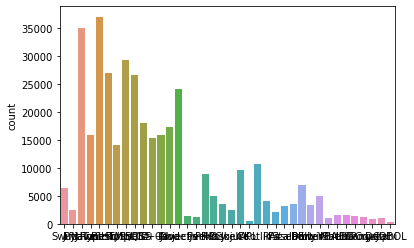

In [129]:
sns.countplot(x=flat_want_lists)

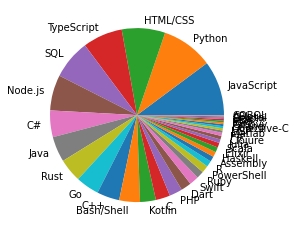

In [130]:
plt.pie(flat_want_lists.value_counts(), labels = flat_want_lists.value_counts().index)
plt.show()

In [131]:
flat_want_lists.value_counts()

JavaScript     37008
Python         34929
HTML/CSS       29353
TypeScript     26905
SQL            26631
Node.js        24100
C#             17999
Java           17222
Rust           15865
Go             15788
C++            15249
Bash/Shell     14043
Kotlin         10691
C               9702
PHP             8852
Dart            7018
Swift           6353
Ruby            4942
PowerShell      4896
R               4015
Assembly        3578
Haskell         3453
Elixir          3374
Scala           3165
Julia           2445
Clojure         2413
F#              2157
Matlab          1562
LISP            1513
Objective-C     1400
Erlang          1379
Groovy          1177
Perl            1175
VBA             1069
Delphi           975
Crystal          790
APL              568
COBOL            309
dtype: int64

## Databases Have Worked With

In [132]:
db_have = df['DatabaseHaveWorkedWith']
db_have.head()

0                 PostgreSQL;SQLite
1                        PostgreSQL
2                            SQLite
3                               NaN
4    Elasticsearch;PostgreSQL;Redis
Name: DatabaseHaveWorkedWith, dtype: object

## 

In [133]:
db_have_lists = db_have.str.split(pat=';')
flat_db_have_lists = db_have_lists.apply(pd.Series).stack().reset_index(drop=True)

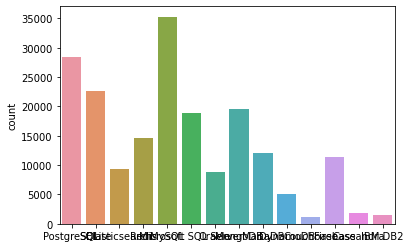

In [134]:
sns.countplot(x=flat_db_have_lists)

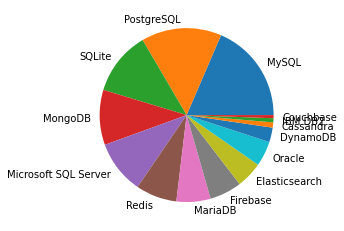

In [135]:
plt.pie(flat_db_have_lists.value_counts(), labels = flat_db_have_lists.value_counts().index)
plt.show()

In [136]:
flat_db_have_lists.value_counts()

MySQL                   35289
PostgreSQL              28424
SQLite                  22634
MongoDB                 19479
Microsoft SQL Server    18896
Redis                   14552
MariaDB                 12088
Firebase                11373
Elasticsearch            9331
Oracle                   8868
DynamoDB                 5137
Cassandra                1873
IBM DB2                  1438
Couchbase                1106
dtype: int64

## DB Want To Work With

In [137]:
db_want = df['DatabaseWantToWorkWith']
db_want.head()

0                                      SQLite
1                                         NaN
2                                      SQLite
3                                         NaN
4    Cassandra;Elasticsearch;PostgreSQL;Redis
Name: DatabaseWantToWorkWith, dtype: object

In [138]:
db_want_lists = db_want.str.split(pat=';')
flat_db_want_lists = db_want_lists.apply(pd.Series).stack().reset_index(drop=True)

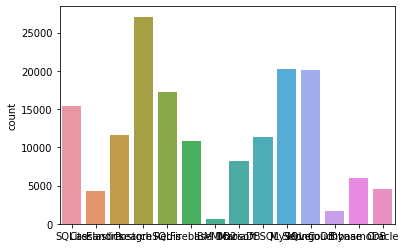

In [139]:
sns.countplot(x=flat_db_want_lists)

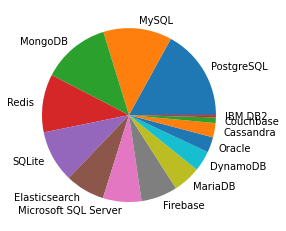

In [140]:
plt.pie(flat_db_want_lists.value_counts(), labels = flat_db_want_lists.value_counts().index)
plt.show()

In [141]:
flat_db_want_lists.value_counts()

PostgreSQL              27082
MySQL                   20307
MongoDB                 20131
Redis                   17212
SQLite                  15381
Elasticsearch           11644
Microsoft SQL Server    11394
Firebase                10776
MariaDB                  8176
DynamoDB                 6039
Oracle                   4557
Cassandra                4227
Couchbase                1670
IBM DB2                   678
dtype: int64

## Platforms Have Worked With

In [142]:
have = df['PlatformHaveWorkedWith']
have.head()

0       NaN
1       NaN
2    Heroku
3       NaN
4       NaN
Name: PlatformHaveWorkedWith, dtype: object

In [143]:
have_lists = have.str.split(pat=';')
have_lists = have_lists.apply(pd.Series).stack().reset_index(drop=True)

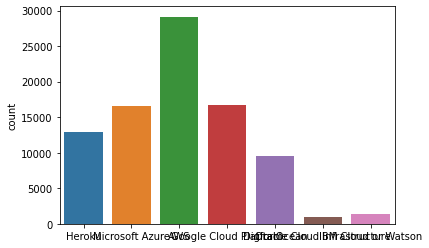

In [144]:
sns.countplot(x=have_lists)

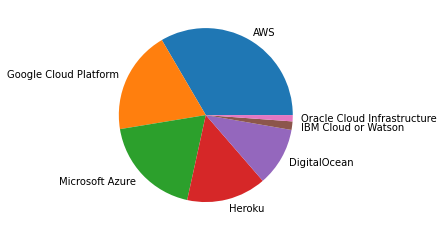

In [145]:
plt.pie(have_lists.value_counts(), labels = have_lists.value_counts().index)
plt.show()

In [146]:
have_lists.value_counts()

AWS                            29138
Google Cloud Platform          16687
Microsoft Azure                16540
Heroku                         12897
DigitalOcean                    9495
IBM Cloud or Watson             1373
Oracle Cloud Infrastructure     1014
dtype: int64

## Platforms Want to Work With

In [147]:
want = df['PlatformWantToWorkWith']
want.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PlatformWantToWorkWith, dtype: object

In [148]:
want_lists = want.str.split(pat=';')
want_lists = want_lists.apply(pd.Series).stack().reset_index(drop=True)

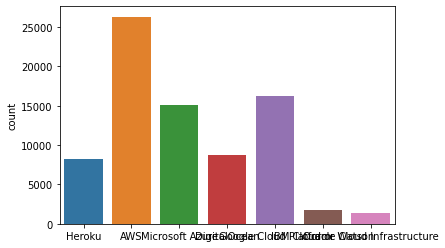

In [149]:
sns.countplot(x=want_lists)

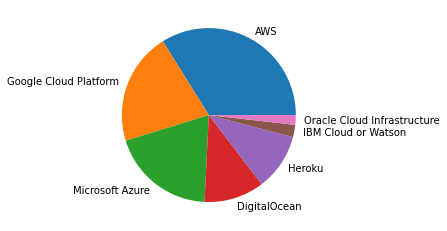

In [150]:
plt.pie(want_lists.value_counts(), labels = want_lists.value_counts().index)
plt.show()

In [151]:
want_lists.value_counts()

AWS                            26295
Google Cloud Platform          16228
Microsoft Azure                15096
DigitalOcean                    8674
Heroku                          8182
IBM Cloud or Watson             1768
Oracle Cloud Infrastructure     1398
dtype: int64

## Web Frameworks Have Worked With

In [152]:
have = df['WebframeHaveWorkedWith']
have.head()

0         Laravel;Symfony
1    Angular;Flask;Vue.js
2                   Flask
3          Angular;jQuery
4                   Flask
Name: WebframeHaveWorkedWith, dtype: object

In [153]:
have_lists = have.str.split(pat=';')
have_lists = have_lists.apply(pd.Series).stack().reset_index(drop=True)

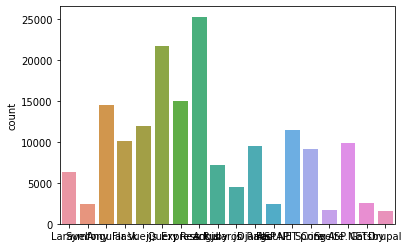

In [154]:
sns.countplot(x=have_lists)

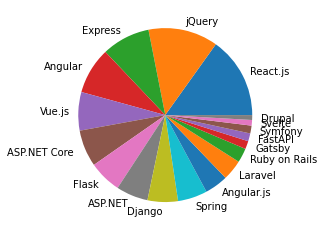

In [155]:
plt.pie(have_lists.value_counts(), labels = have_lists.value_counts().index)
plt.show()

In [156]:
have_lists.value_counts()

React.js         25296
jQuery           21693
Express          15010
Angular          14471
Vue.js           11954
ASP.NET Core     11404
Flask            10174
ASP.NET           9918
Django            9446
Spring            9177
Angular.js        7242
Laravel           6377
Ruby on Rails     4438
Gatsby            2501
FastAPI           2447
Symfony           2427
Svelte            1735
Drupal            1508
dtype: int64

## Web Frameworks Want to Work With

In [157]:
want = df['WebframeWantToWorkWith']
want.head()

0               NaN
1               NaN
2             Flask
3    Angular;jQuery
4             Flask
Name: WebframeWantToWorkWith, dtype: object

In [158]:
want_lists = want.str.split(pat=';')
want_lists = want_lists.apply(pd.Series).stack().reset_index(drop=True)

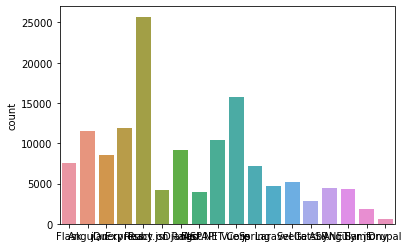

In [159]:
sns.countplot(x=want_lists)

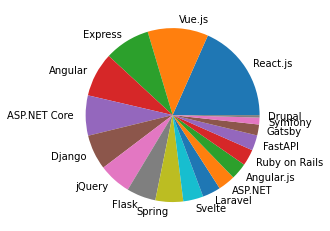

In [160]:
plt.pie(want_lists.value_counts(), labels = want_lists.value_counts().index)
plt.show()

In [161]:
want_lists.value_counts()

React.js         25718
Vue.js           15784
Express          11885
Angular          11533
ASP.NET Core     10454
Django            9112
jQuery            8487
Flask             7594
Spring            7229
Svelte            5235
Laravel           4734
ASP.NET           4488
Angular.js        4293
Ruby on Rails     4249
FastAPI           3989
Gatsby            2830
Symfony           1786
Drupal             653
dtype: int64

## Misc Tech Have Worked With


In [162]:
have = df['MiscTechHaveWorkedWith']
have.head()

0                                      NaN
1                                  Cordova
2    NumPy;Pandas;TensorFlow;Torch/PyTorch
3                                      NaN
4         Apache Spark;Hadoop;NumPy;Pandas
Name: MiscTechHaveWorkedWith, dtype: object

In [163]:
have_lists = have.str.split(pat=';')
have_lists = have_lists.apply(pd.Series).stack().reset_index(drop=True)

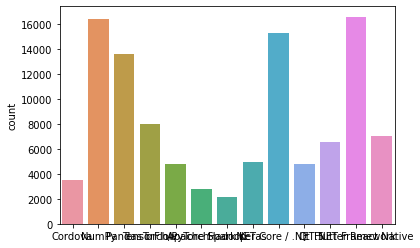

In [164]:
sns.countplot(x=have_lists)

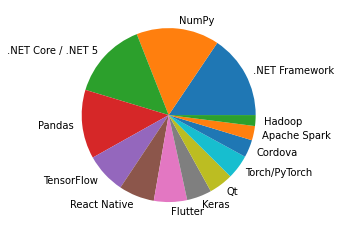

In [165]:
plt.pie(have_lists.value_counts(), labels = have_lists.value_counts().index)
plt.show()

In [166]:
have_lists.value_counts()

.NET Framework        16620
NumPy                 16445
.NET Core / .NET 5    15310
Pandas                13664
TensorFlow             8034
React Native           7051
Flutter                6586
Keras                  4930
Qt                     4812
Torch/PyTorch          4808
Cordova                3491
Apache Spark           2833
Hadoop                 2155
dtype: int64

## Misc Tech Want To Work With

In [167]:
want = df['MiscTechWantToWorkWith']
want.head()

0                                            NaN
1                                            NaN
2    Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch
3                                            NaN
4                            Hadoop;NumPy;Pandas
Name: MiscTechWantToWorkWith, dtype: object

In [168]:
want_lists = want.str.split(pat=';')
want_lists = want_lists.apply(pd.Series).stack().reset_index(drop=True)

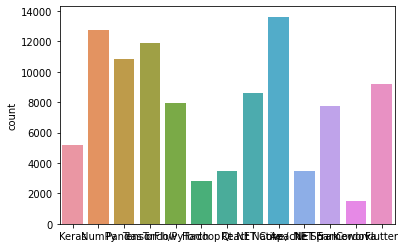

In [169]:
sns.countplot(x=want_lists)

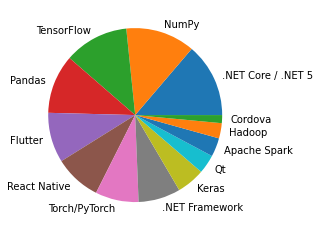

In [170]:
plt.pie(want_lists.value_counts(), labels = want_lists.value_counts().index)
plt.show()

In [171]:
want_lists.value_counts()

.NET Core / .NET 5    13630
NumPy                 12773
TensorFlow            11879
Pandas                10863
Flutter                9212
React Native           8621
Torch/PyTorch          7977
.NET Framework         7761
Keras                  5190
Qt                     3478
Apache Spark           3453
Hadoop                 2802
Cordova                1475
dtype: int64

## Tools Tech Have Worked With

In [172]:
have = df['ToolsTechHaveWorkedWith']
have.head()

0                           NaN
1               Docker;Git;Yarn
2                           NaN
3                           NaN
4    Docker;Git;Kubernetes;Yarn
Name: ToolsTechHaveWorkedWith, dtype: object

In [173]:
have_lists = have.str.split(pat=';')
have_lists = have_lists.apply(pd.Series).stack().reset_index(drop=True)

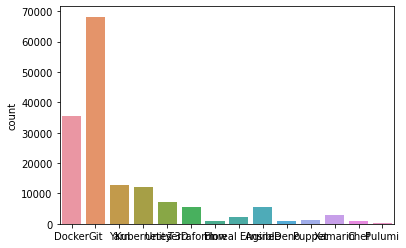

In [174]:
sns.countplot(x=have_lists)

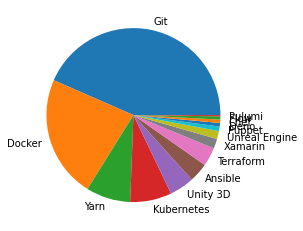

In [175]:
plt.pie(have_lists.value_counts(), labels = have_lists.value_counts().index)
plt.show()

In [176]:
have_lists.value_counts()

Git              68171
Docker           35644
Yarn             12937
Kubernetes       12115
Unity 3D          7206
Ansible           5607
Terraform         5442
Xamarin           2844
Unreal Engine     2339
Puppet            1313
Deno              1027
Chef               982
Flow               929
Pulumi             368
dtype: int64

## Tech Tool Want To Work With

In [177]:
want = df['ToolsTechWantToWorkWith']
want.head()

0                           NaN
1                           Git
2                           NaN
3                           NaN
4    Docker;Git;Kubernetes;Yarn
Name: ToolsTechWantToWorkWith, dtype: object

In [178]:
want_lists = want.str.split(pat=';')
want_lists = want_lists.apply(pd.Series).stack().reset_index(drop=True)

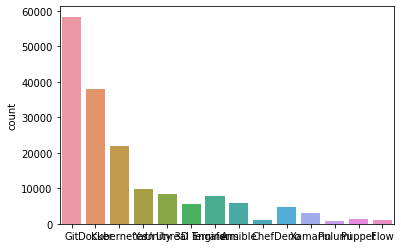

In [179]:
sns.countplot(x=want_lists)

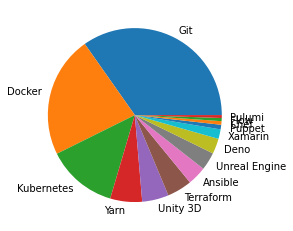

In [180]:
plt.pie(want_lists.value_counts(), labels = want_lists.value_counts().index)
plt.show()

In [181]:
want_lists.value_counts()

Git              58308
Docker           37870
Kubernetes       21977
Yarn              9936
Unity 3D          8285
Terraform         7756
Ansible           5876
Unreal Engine     5563
Deno              4773
Xamarin           2977
Puppet            1428
Chef              1119
Flow               974
Pulumi             901
dtype: int64

## Collab Tools Have Worked With

In [182]:
have = df['NEWCollabToolsHaveWorkedWith']
have.head()

0                                       PHPStorm;Xcode
1            Android Studio;IntelliJ;Notepad++;PyCharm
2    IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...
3                                                  NaN
4           Atom;IPython/Jupyter;Notepad++;PyCharm;Vim
Name: NEWCollabToolsHaveWorkedWith, dtype: object

In [183]:
have_lists = have.str.split(pat=';')
have_lists = have_lists.apply(pd.Series).stack().reset_index(drop=True)

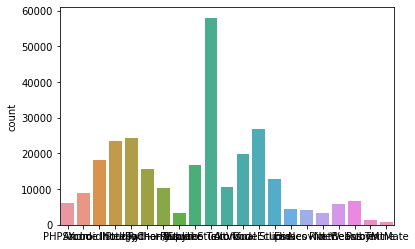

In [184]:
sns.countplot(x=have_lists)

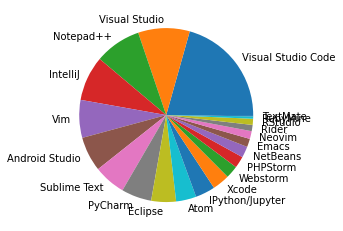

In [185]:
plt.pie(have_lists.value_counts(), labels = have_lists.value_counts().index)
plt.show()

In [186]:
have_lists.value_counts()

Visual Studio Code    58026
Visual Studio         26970
Notepad++             24262
IntelliJ              23467
Vim                   19752
Android Studio        18141
Sublime Text          16714
PyCharm               15755
Eclipse               12955
Atom                  10564
IPython/Jupyter       10310
Xcode                  9040
Webstorm               6564
PHPStorm               6096
NetBeans               5839
Emacs                  4327
Neovim                 4071
Rider                  3255
RStudio                3200
RubyMine               1219
TextMate                678
dtype: int64

## Collab Tools Want To Work With

In [187]:
want = df['NEWCollabToolsWantToWorkWith']
want.head()

0                                           Atom;Xcode
1                                                  NaN
2    IPython/Jupyter;RStudio;Sublime Text;Visual St...
3                                                  NaN
4    Atom;IPython/Jupyter;Notepad++;PyCharm;Vim;Vis...
Name: NEWCollabToolsWantToWorkWith, dtype: object

In [188]:
want_lists = want.str.split(pat=';')
want_lists = want_lists.apply(pd.Series).stack().reset_index(drop=True)

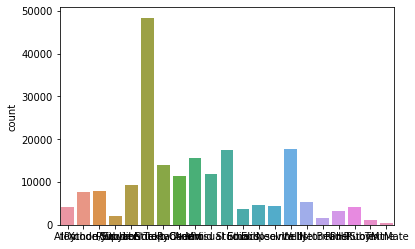

In [189]:
sns.countplot(x=want_lists)

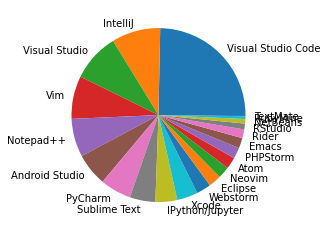

In [190]:
plt.pie(want_lists.value_counts(), labels = want_lists.value_counts().index)
plt.show()

In [191]:
want_lists.value_counts()

Visual Studio Code    48360
IntelliJ              17777
Visual Studio         17580
Vim                   15620
Notepad++             13916
Android Studio        11916
PyCharm               11343
Sublime Text           9326
IPython/Jupyter        7931
Xcode                  7596
Webstorm               5311
Eclipse                4592
Neovim                 4293
Atom                   4224
PHPStorm               4044
Emacs                  3736
Rider                  3210
RStudio                2095
NetBeans               1652
RubyMine               1021
TextMate                396
dtype: int64

## OpSys

In [192]:
have = df['OpSys']
have.head()

0          MacOS
1        Windows
2          MacOS
3        Windows
4    Linux-based
Name: OpSys, dtype: object

In [193]:
have_lists = have.str.split(pat=';')
have_lists = have_lists.apply(pd.Series).stack().reset_index(drop=True)

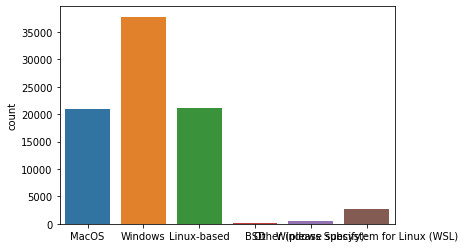

In [194]:
sns.countplot(x=have_lists)

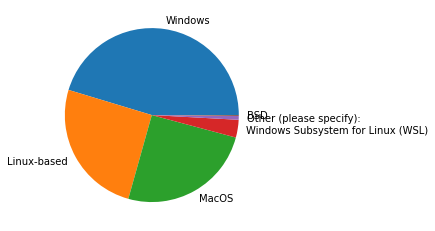

In [195]:
plt.pie(have_lists.value_counts(), labels = have_lists.value_counts().index)
plt.show()

In [196]:
have_lists.value_counts()

Windows                              37758
Linux-based                          21088
MacOS                                20984
Windows Subsystem for Linux (WSL)     2743
Other (please specify):                575
BSD                                    146
dtype: int64

# Prepare DataSet for building Predictor Models

In [197]:
want_df = df[['LanguageWantToWorkWith']]
want_df = want_df.dropna()
want_df["Want_JavaScript"] = want_df.apply(lambda row:  "JavaScript"  in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Python"    ] = want_df.apply(lambda row:  "Python"      in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_HTML/CSS"  ] = want_df.apply(lambda row:  "HTML/CSS"    in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_TypeScript"] = want_df.apply(lambda row:  "TypeScript"  in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_SQL"       ] = want_df.apply(lambda row:  "SQL"         in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Node.js"   ] = want_df.apply(lambda row:  "Node.js"     in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_C#"        ] = want_df.apply(lambda row:  "C#"          in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Java"      ] = want_df.apply(lambda row:  "Java"        in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Rust"      ] = want_df.apply(lambda row:  "Rust"        in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Go"        ] = want_df.apply(lambda row:  "Go"          in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_C++"       ] = want_df.apply(lambda row:  "C++"         in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Bash/Shell"] = want_df.apply(lambda row:  "Bash/Shell"  in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Kotlin"    ] = want_df.apply(lambda row:  "Kotlin"      in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_C"         ] = want_df.apply(lambda row:  "C;"          in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_PHP"       ] = want_df.apply(lambda row:  "PHP"         in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Dart"      ] = want_df.apply(lambda row:  "Dart"        in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Swift"     ] = want_df.apply(lambda row:  "Swift"       in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Ruby"      ] = want_df.apply(lambda row:  "Ruby"        in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_PowerShell"] = want_df.apply(lambda row:  "PowerShell"  in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_R"         ] = want_df.apply(lambda row:  "R"           in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Assembly"  ] = want_df.apply(lambda row:  "Assembly"    in row['LanguageWantToWorkWith'] , axis=1)
want_df["Want_Haskell"   ] = want_df.apply(lambda row:  "Haskell"     in row['LanguageWantToWorkWith'] , axis=1)


In [198]:
want_df

,LanguageWantToWorkWith,Want_JavaScript,Want_Python,Want_HTML/CSS,Want_TypeScript,Want_SQL,Want_Node.js,Want_C#,Want_Java,Want_Rust,...,Want_Kotlin,Want_C,Want_PHP,Want_Dart,Want_Swift,Want_Ruby,Want_PowerShell,Want_R,Want_Assembly,Want_Haskell
0,Swift,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,Julia;Python;Rust,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,JavaScript;TypeScript,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Bash/Shell;HTML/CSS;Python;SQL,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,C#;C++;Go;HTML/CSS;Java;JavaScript;Node.js;Obj...,True,True,True,False,True,True,True,True,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83433,Kotlin,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
83434,Clojure,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,Java;Python,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
83437,Go;Rust,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [199]:

have_df = df[['LanguageHaveWorkedWith']]
have_df = have_df.dropna()
have_df["Have_JavaScript"] = have_df.apply(lambda row:  "JavaScript"  in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Python"    ] = have_df.apply(lambda row:  "Python"      in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_HTML/CSS"  ] = have_df.apply(lambda row:  "HTML/CSS"    in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_TypeScript"] = have_df.apply(lambda row:  "TypeScript"  in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_SQL"       ] = have_df.apply(lambda row:  "SQL"         in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Node.js"   ] = have_df.apply(lambda row:  "Node.js"     in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_C#"        ] = have_df.apply(lambda row:  "C#"          in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Java"      ] = have_df.apply(lambda row:  "Java"        in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Rust"      ] = have_df.apply(lambda row:  "Rust"        in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Go"        ] = have_df.apply(lambda row:  "Go"          in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_C++"       ] = have_df.apply(lambda row:  "C++"         in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Bash/Shell"] = have_df.apply(lambda row:  "Bash/Shell"  in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Kotlin"    ] = have_df.apply(lambda row:  "Kotlin"      in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_C"         ] = have_df.apply(lambda row:  "C;"          in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_PHP"       ] = have_df.apply(lambda row:  "PHP"         in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Dart"      ] = have_df.apply(lambda row:  "Dart"        in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Swift"     ] = have_df.apply(lambda row:  "Swift"       in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Ruby"      ] = have_df.apply(lambda row:  "Ruby"        in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_PowerShell"] = have_df.apply(lambda row:  "PowerShell"  in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_R"         ] = have_df.apply(lambda row:  "R"           in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Assembly"  ] = have_df.apply(lambda row:  "Assembly"    in row['LanguageHaveWorkedWith'] , axis=1)
have_df["Have_Haskell"   ] = have_df.apply(lambda row:  "Haskell"     in row['LanguageHaveWorkedWith'] , axis=1)

In [200]:
have_df

,LanguageHaveWorkedWith,Have_JavaScript,Have_Python,Have_HTML/CSS,Have_TypeScript,Have_SQL,Have_Node.js,Have_C#,Have_Java,Have_Rust,...,Have_Kotlin,Have_C,Have_PHP,Have_Dart,Have_Swift,Have_Ruby,Have_PowerShell,Have_R,Have_Assembly,Have_Haskell
0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,True,False,True,False,False,False,False,True,False,...,False,True,True,False,True,False,False,False,False,False
1,JavaScript;Python,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Assembly;C;Python;R;Rust,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,True,False
3,JavaScript;TypeScript,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Bash/Shell;HTML/CSS;Python;SQL,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83433,Java;JavaScript;Kotlin;Objective-C;TypeScript,True,False,False,True,False,False,False,True,False,...,True,True,False,False,False,False,False,False,False,False
83434,Clojure;Kotlin;SQL,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
83436,Groovy;Java;Python,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
83437,Bash/Shell;JavaScript;Node.js;Python,True,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [201]:
combined_df = have_df.join(want_df)
combined_df

,LanguageHaveWorkedWith,Have_JavaScript,Have_Python,Have_HTML/CSS,Have_TypeScript,Have_SQL,Have_Node.js,Have_C#,Have_Java,Have_Rust,...,Want_Kotlin,Want_C,Want_PHP,Want_Dart,Want_Swift,Want_Ruby,Want_PowerShell,Want_R,Want_Assembly,Want_Haskell
0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,True,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,JavaScript;Python,True,True,False,False,False,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Assembly;C;Python;R;Rust,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,JavaScript;TypeScript,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Bash/Shell;HTML/CSS;Python;SQL,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83433,Java;JavaScript;Kotlin;Objective-C;TypeScript,True,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
83434,Clojure;Kotlin;SQL,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,Groovy;Java;Python,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
83437,Bash/Shell;JavaScript;Node.js;Python,True,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False


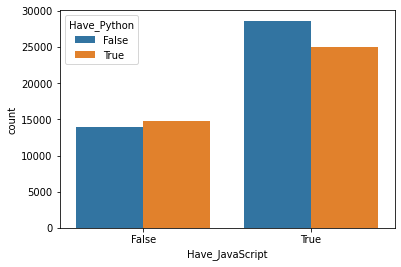

In [202]:
sns.countplot(x="Have_JavaScript", hue="Have_Python", data=combined_df)

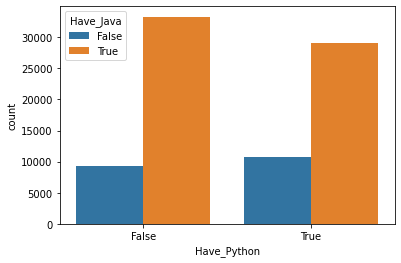

In [203]:
sns.countplot(x="Have_Python", hue="Have_Java", data=combined_df)

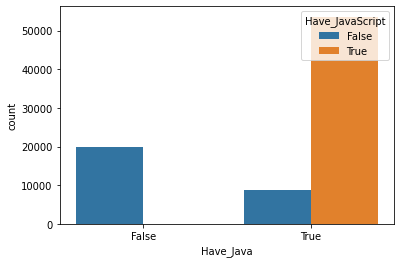

In [204]:
sns.countplot(x="Have_Java", hue = "Have_JavaScript", data=combined_df)

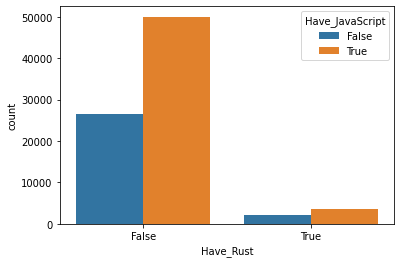

In [205]:
sns.countplot(x="Have_Rust", hue="Have_JavaScript", data=combined_df)

# Feature Engineering

In [229]:
final_df = df[['LanguageHaveWorkedWith','LanguageWantToWorkWith',
               'DatabaseHaveWorkedWith','DatabaseWantToWorkWith',
               'PlatformHaveWorkedWith','PlatformWantToWorkWith',
               'WebframeHaveWorkedWith','WebframeWantToWorkWith',
               'MiscTechHaveWorkedWith','MiscTechWantToWorkWith',
               'ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith','EdLevel']]

In [230]:
# santize for have/want for language break-out
final_df = final_df.dropna()
final_df["JavaScript"] = final_df.apply(lambda row: 2 if "JavaScript"  in row['LanguageHaveWorkedWith'] else 1 if "JavaScript"  in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Python"    ] = final_df.apply(lambda row: 2 if "Python"      in row['LanguageHaveWorkedWith'] else 1 if "Python"      in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["HTML/CSS"  ] = final_df.apply(lambda row: 2 if "HTML/CSS"    in row['LanguageHaveWorkedWith'] else 1 if "HTML/CSS"    in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["TypeScript"] = final_df.apply(lambda row: 2 if "TypeScript"  in row['LanguageHaveWorkedWith'] else 1 if "TypeScript"  in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["SQL"       ] = final_df.apply(lambda row: 2 if "SQL"         in row['LanguageHaveWorkedWith'] else 1 if "SQL"         in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["C#"        ] = final_df.apply(lambda row: 2 if "C#"          in row['LanguageHaveWorkedWith'] else 1 if "C#"          in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Java"      ] = final_df.apply(lambda row: 2 if "Java;"       in row['LanguageHaveWorkedWith'] else 1 if "Java;"       in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Rust"      ] = final_df.apply(lambda row: 2 if "Rust"        in row['LanguageHaveWorkedWith'] else 1 if "Rust"        in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Go"        ] = final_df.apply(lambda row: 2 if "Go"          in row['LanguageHaveWorkedWith'] else 1 if "Go"          in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["C++"       ] = final_df.apply(lambda row: 2 if "C++"         in row['LanguageHaveWorkedWith'] else 1 if "C++"         in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Shell"     ] = final_df.apply(lambda row: 2 if "Shell"       in row['LanguageHaveWorkedWith'] else 1 if "Shell"       in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Kotlin"    ] = final_df.apply(lambda row: 2 if "Kotlin"      in row['LanguageHaveWorkedWith'] else 1 if "Kotlin"      in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["C"         ] = final_df.apply(lambda row: 2 if "C;"          in row['LanguageHaveWorkedWith'] else 1 if "C;"          in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["PHP"       ] = final_df.apply(lambda row: 2 if "PHP"         in row['LanguageHaveWorkedWith'] else 1 if "PHP"         in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Swift"     ] = final_df.apply(lambda row: 2 if "Swift"       in row['LanguageHaveWorkedWith'] else 1 if "Swift"       in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Ruby"      ] = final_df.apply(lambda row: 2 if "Ruby"        in row['LanguageHaveWorkedWith'] else 1 if "Ruby"        in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["R"         ] = final_df.apply(lambda row: 2 if "R;"          in row['LanguageHaveWorkedWith'] else 1 if "R;"          in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Assembly"  ] = final_df.apply(lambda row: 2 if "Assembly"    in row['LanguageHaveWorkedWith'] else 1 if "Assembly"    in row['LanguageWantToWorkWith'] else 0, axis=1)
final_df["Haskell"   ] = final_df.apply(lambda row: 2 if "Haskell"     in row['LanguageHaveWorkedWith'] else 1 if "Haskell"     in row['LanguageWantToWorkWith'] else 0, axis=1)

In [231]:
final_df = final_df.drop(columns=['LanguageHaveWorkedWith','LanguageWantToWorkWith'])
final_df

,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,...,C++,Shell,Kotlin,C,PHP,Swift,Ruby,R,Assembly,Haskell
10,Microsoft SQL Server;Oracle,Elasticsearch;MySQL,Microsoft Azure,AWS;Microsoft Azure,Angular;ASP.NET Core,ASP.NET Core,.NET Core / .NET 5,.NET Core / .NET 5,Git,Docker;Git,...,0,0,0,0,0,0,0,0,0,0
16,Microsoft SQL Server;MongoDB;PostgreSQL,MongoDB;PostgreSQL,AWS;Google Cloud Platform,AWS;Google Cloud Platform,Angular;ASP.NET Core ;Spring,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,.NET Core / .NET 5,Git;Kubernetes,Git;Kubernetes,...,0,0,0,0,0,0,0,0,0,0
45,Microsoft SQL Server;PostgreSQL;Redis,Microsoft SQL Server;PostgreSQL;Redis,Heroku;Microsoft Azure,AWS;Microsoft Azure,ASP.NET Core ;React.js,ASP.NET Core ;React.js;Svelte,.NET Core / .NET 5,.NET Core / .NET 5;React Native,Docker;Git;Kubernetes,Docker;Git;Unity 3D;Unreal Engine,...,2,2,0,0,0,0,0,0,0,0
50,Couchbase;MariaDB;Microsoft SQL Server;MongoDB...,Couchbase;Microsoft SQL Server;MongoDB;Redis;S...,AWS;DigitalOcean;Microsoft Azure,DigitalOcean,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,Angular;Express;Gatsby;React.js;Svelte,.NET Framework;.NET Core / .NET 5,Hadoop;React Native,Docker;Kubernetes,Docker;Terraform,...,0,2,0,0,0,0,0,0,0,0
52,Firebase;MongoDB;Redis,DynamoDB;Elasticsearch;Firebase;MongoDB;Redis,AWS;DigitalOcean;Heroku;Microsoft Azure;Oracle...,AWS;DigitalOcean;Google Cloud Platform;Heroku;...,Angular;Express;React.js,Angular;Express;React.js,Cordova,Cordova,Docker;Git;Kubernetes,Docker;Git;Kubernetes,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83423,Elasticsearch;MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL;Redis;SQLite,AWS;DigitalOcean;Google Cloud Platform;Heroku,AWS;DigitalOcean;Heroku;Microsoft Azure,Django;Flask;Laravel;React.js;Symfony;Vue.js,Django;FastAPI;Flask;Gatsby;Laravel;React.js;V...,Flutter,Flutter;TensorFlow;Torch/PyTorch,Docker;Git;Yarn,Docker;Git;Kubernetes;Yarn,...,0,0,0,0,2,0,0,0,0,0
83428,Elasticsearch;MongoDB;PostgreSQL;Redis,Elasticsearch;PostgreSQL;Redis,AWS;Google Cloud Platform,AWS;Google Cloud Platform,React.js,React.js,React Native,Flutter;React Native,Docker;Git;Terraform;Yarn,Docker;Git;Terraform;Yarn,...,0,2,0,0,0,0,0,0,0,0
83429,MongoDB;MySQL;PostgreSQL,MariaDB;Microsoft SQL Server;MongoDB;MySQL;Pos...,Heroku,AWS;Heroku;IBM Cloud or Watson;Microsoft Azure...,Django;Flask;jQuery,Angular.js;ASP.NET;ASP.NET Core ;Django;FastAP...,NumPy;Pandas,.NET Framework;.NET Core / .NET 5;NumPy;Pandas,Git,Docker;Git;Xamarin,...,0,2,0,0,2,0,0,0,0,0
83431,Firebase;MySQL;SQLite,DynamoDB;Firebase;MongoDB;MySQL;SQLite,Google Cloud Platform,AWS;Google Cloud Platform,Flask;jQuery,Angular;Django;Flask;jQuery;Laravel,Flutter,Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch,Git,Docker;Git,...,0,0,2,0,2,2,1,0,0,0


In [232]:
# santize for have/want for database break-out
final_df["MySQL"               ] = final_df.apply(lambda row: 2 if "MySQL"                in row['DatabaseHaveWorkedWith'] else 1 if "MySQL"                in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["PostgreSQL"          ] = final_df.apply(lambda row: 2 if "PostgreSQL"           in row['DatabaseHaveWorkedWith'] else 1 if "PostgreSQL"           in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["SQLite"              ] = final_df.apply(lambda row: 2 if "SQLite"               in row['DatabaseHaveWorkedWith'] else 1 if "SQLite"               in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["MongoDB"             ] = final_df.apply(lambda row: 2 if "MongoDB"              in row['DatabaseHaveWorkedWith'] else 1 if "MongoDB"              in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["Microsoft SQL Server"] = final_df.apply(lambda row: 2 if "Microsoft SQL Server" in row['DatabaseHaveWorkedWith'] else 1 if "Microsoft SQL Server" in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["Redis"               ] = final_df.apply(lambda row: 2 if "Redis"                in row['DatabaseHaveWorkedWith'] else 1 if "Redis"                in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["MariaDB"             ] = final_df.apply(lambda row: 2 if "MariaDB"              in row['DatabaseHaveWorkedWith'] else 1 if "MariaDB"              in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["Firebase"            ] = final_df.apply(lambda row: 2 if "Firebase"             in row['DatabaseHaveWorkedWith'] else 1 if "Firebase"             in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["Elasticsearch"       ] = final_df.apply(lambda row: 2 if "Elasticsearch"        in row['DatabaseHaveWorkedWith'] else 1 if "Elasticsearch"        in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["Oracle"              ] = final_df.apply(lambda row: 2 if "Oracle"               in row['DatabaseHaveWorkedWith'] else 1 if "Oracle"               in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["DynamoDB"            ] = final_df.apply(lambda row: 2 if "DynamoDB"             in row['DatabaseHaveWorkedWith'] else 1 if "DynamoDB"             in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["Cassandra"           ] = final_df.apply(lambda row: 2 if "Cassandra"            in row['DatabaseHaveWorkedWith'] else 1 if "Cassandra"            in row['DatabaseWantToWorkWith'] else 0, axis=1)
final_df["Couch"               ] = final_df.apply(lambda row: 2 if "Couch"                in row['DatabaseHaveWorkedWith'] else 1 if "Couch"                in row['DatabaseWantToWorkWith'] else 0, axis=1)

In [233]:
final_df = final_df.drop(columns=['DatabaseHaveWorkedWith','DatabaseWantToWorkWith'])
final_df

,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,EdLevel,JavaScript,...,MongoDB,Microsoft SQL Server,Redis,MariaDB,Firebase,Elasticsearch,Oracle,DynamoDB,Cassandra,Couch
10,Microsoft Azure,AWS;Microsoft Azure,Angular;ASP.NET Core,ASP.NET Core,.NET Core / .NET 5,.NET Core / .NET 5,Git,Docker;Git,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,...,0,2,0,0,0,1,2,0,0,0
16,AWS;Google Cloud Platform,AWS;Google Cloud Platform,Angular;ASP.NET Core ;Spring,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,.NET Core / .NET 5,Git;Kubernetes,Git;Kubernetes,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,...,2,2,0,0,0,0,0,0,0,0
45,Heroku;Microsoft Azure,AWS;Microsoft Azure,ASP.NET Core ;React.js,ASP.NET Core ;React.js;Svelte,.NET Core / .NET 5,.NET Core / .NET 5;React Native,Docker;Git;Kubernetes,Docker;Git;Unity 3D;Unreal Engine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,...,0,2,2,0,0,0,0,0,0,0
50,AWS;DigitalOcean;Microsoft Azure,DigitalOcean,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,Angular;Express;Gatsby;React.js;Svelte,.NET Framework;.NET Core / .NET 5,Hadoop;React Native,Docker;Kubernetes,Docker;Terraform,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,...,2,2,2,2,0,0,0,0,0,2
52,AWS;DigitalOcean;Heroku;Microsoft Azure;Oracle...,AWS;DigitalOcean;Google Cloud Platform;Heroku;...,Angular;Express;React.js,Angular;Express;React.js,Cordova,Cordova,Docker;Git;Kubernetes,Docker;Git;Kubernetes,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,...,2,0,2,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83423,AWS;DigitalOcean;Google Cloud Platform;Heroku,AWS;DigitalOcean;Heroku;Microsoft Azure,Django;Flask;Laravel;React.js;Symfony;Vue.js,Django;FastAPI;Flask;Gatsby;Laravel;React.js;V...,Flutter,Flutter;TensorFlow;Torch/PyTorch,Docker;Git;Yarn,Docker;Git;Kubernetes;Yarn,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,...,0,0,2,0,0,2,0,0,0,0
83428,AWS;Google Cloud Platform,AWS;Google Cloud Platform,React.js,React.js,React Native,Flutter;React Native,Docker;Git;Terraform;Yarn,Docker;Git;Terraform;Yarn,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,...,2,0,2,0,0,2,0,0,0,0
83429,Heroku,AWS;Heroku;IBM Cloud or Watson;Microsoft Azure...,Django;Flask;jQuery,Angular.js;ASP.NET;ASP.NET Core ;Django;FastAP...,NumPy;Pandas,.NET Framework;.NET Core / .NET 5;NumPy;Pandas,Git,Docker;Git;Xamarin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,...,2,1,0,1,0,0,0,0,0,0
83431,Google Cloud Platform,AWS;Google Cloud Platform,Flask;jQuery,Angular;Django;Flask;jQuery;Laravel,Flutter,Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch,Git,Docker;Git,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,...,1,0,0,0,2,0,0,1,0,0


In [234]:
# santize for have/want for Platform break-out
final_df["AWS"                  ] = final_df.apply(lambda row: 2 if "AWS"                   in row['PlatformHaveWorkedWith'] else 1 if "AWS"                   in row['PlatformWantToWorkWith'] else 0, axis=1)
final_df["Google Cloud Platform"] = final_df.apply(lambda row: 2 if "Google Cloud Platform" in row['PlatformHaveWorkedWith'] else 1 if "Google Cloud Platform" in row['PlatformWantToWorkWith'] else 0, axis=1)
final_df["Microsoft Azure"      ] = final_df.apply(lambda row: 2 if "Microsoft Azure"       in row['PlatformHaveWorkedWith'] else 1 if "Microsoft Azure"       in row['PlatformWantToWorkWith'] else 0, axis=1)
final_df["Heroku"               ] = final_df.apply(lambda row: 2 if "Heroku"                in row['PlatformHaveWorkedWith'] else 1 if "Heroku"                in row['PlatformWantToWorkWith'] else 0, axis=1)
final_df["DigitalOcean"         ] = final_df.apply(lambda row: 2 if "DigitalOcean"          in row['PlatformHaveWorkedWith'] else 1 if "DigitalOcean"          in row['PlatformWantToWorkWith'] else 0, axis=1)

In [235]:
final_df = final_df.drop(columns=['PlatformHaveWorkedWith','PlatformWantToWorkWith'])
final_df

,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,EdLevel,JavaScript,Python,HTML/CSS,...,Elasticsearch,Oracle,DynamoDB,Cassandra,Couch,AWS,Google Cloud Platform,Microsoft Azure,Heroku,DigitalOcean
10,Angular;ASP.NET Core,ASP.NET Core,.NET Core / .NET 5,.NET Core / .NET 5,Git,Docker;Git,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,0,...,1,2,0,0,0,1,0,2,0,0
16,Angular;ASP.NET Core ;Spring,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,.NET Core / .NET 5,Git;Kubernetes,Git;Kubernetes,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,...,0,0,0,0,0,2,2,0,0,0
45,ASP.NET Core ;React.js,ASP.NET Core ;React.js;Svelte,.NET Core / .NET 5,.NET Core / .NET 5;React Native,Docker;Git;Kubernetes,Docker;Git;Unity 3D;Unreal Engine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,0,...,0,0,0,0,0,1,0,2,2,0
50,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,Angular;Express;Gatsby;React.js;Svelte,.NET Framework;.NET Core / .NET 5,Hadoop;React Native,Docker;Kubernetes,Docker;Terraform,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,...,0,0,0,0,2,2,0,2,0,2
52,Angular;Express;React.js,Angular;Express;React.js,Cordova,Cordova,Docker;Git;Kubernetes,Docker;Git;Kubernetes,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,...,1,0,1,0,0,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83423,Django;Flask;Laravel;React.js;Symfony;Vue.js,Django;FastAPI;Flask;Gatsby;Laravel;React.js;V...,Flutter,Flutter;TensorFlow;Torch/PyTorch,Docker;Git;Yarn,Docker;Git;Kubernetes;Yarn,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,...,2,0,0,0,0,2,2,1,2,2
83428,React.js,React.js,React Native,Flutter;React Native,Docker;Git;Terraform;Yarn,Docker;Git;Terraform;Yarn,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,...,2,0,0,0,0,2,2,0,0,0
83429,Django;Flask;jQuery,Angular.js;ASP.NET;ASP.NET Core ;Django;FastAP...,NumPy;Pandas,.NET Framework;.NET Core / .NET 5;NumPy;Pandas,Git,Docker;Git;Xamarin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,2,2,...,0,0,0,0,0,1,0,1,2,0
83431,Flask;jQuery,Angular;Django;Flask;jQuery;Laravel,Flutter,Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch,Git,Docker;Git,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,2,2,...,0,0,1,0,0,1,2,0,0,0


In [236]:
# santize for have/want for WebFramework break-out
final_df["React.js"     ] = final_df.apply(lambda row: 2 if "React.js"      in row['WebframeHaveWorkedWith'] else 1 if "React.js"      in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["jQuery"       ] = final_df.apply(lambda row: 2 if "jQuery"        in row['WebframeHaveWorkedWith'] else 1 if "jQuery"        in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Express"      ] = final_df.apply(lambda row: 2 if "Express"       in row['WebframeHaveWorkedWith'] else 1 if "Express"       in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Angular"      ] = final_df.apply(lambda row: 2 if "Angular"       in row['WebframeHaveWorkedWith'] else 1 if "Angular"       in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Vue.js"       ] = final_df.apply(lambda row: 2 if "Vue.js"        in row['WebframeHaveWorkedWith'] else 1 if "Vue.js"        in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Flask"        ] = final_df.apply(lambda row: 2 if "Flask"         in row['WebframeHaveWorkedWith'] else 1 if "Flask"         in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["ASP.NET"      ] = final_df.apply(lambda row: 2 if "ASP.NET"       in row['WebframeHaveWorkedWith'] else 1 if "ASP.NET"       in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Django"       ] = final_df.apply(lambda row: 2 if "Django"        in row['WebframeHaveWorkedWith'] else 1 if "Django"        in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Spring"       ] = final_df.apply(lambda row: 2 if "Spring"        in row['WebframeHaveWorkedWith'] else 1 if "Spring"        in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Laravel"      ] = final_df.apply(lambda row: 2 if "Laravel"       in row['WebframeHaveWorkedWith'] else 1 if "Laravel"       in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Ruby on Rails"] = final_df.apply(lambda row: 2 if "Ruby on Rails" in row['WebframeHaveWorkedWith'] else 1 if "Ruby on Rails" in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Gatsby"       ] = final_df.apply(lambda row: 2 if "Gatsby"        in row['WebframeHaveWorkedWith'] else 1 if "Gatsby"        in row['WebframeWantToWorkWith'] else 0, axis=1)
final_df["Drupal"       ] = final_df.apply(lambda row: 2 if "Drupal"        in row['WebframeHaveWorkedWith'] else 1 if "Drupal"        in row['WebframeWantToWorkWith'] else 0, axis=1)

In [237]:
final_df = final_df.drop(columns=['WebframeHaveWorkedWith','WebframeWantToWorkWith'])
final_df

,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,EdLevel,JavaScript,Python,HTML/CSS,TypeScript,SQL,...,Angular,Vue.js,Flask,ASP.NET,Django,Spring,Laravel,Ruby on Rails,Gatsby,Drupal
10,.NET Core / .NET 5,.NET Core / .NET 5,Git,Docker;Git,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,0,2,0,...,2,0,0,2,0,0,0,0,0,0
16,.NET Core / .NET 5;Flutter,.NET Core / .NET 5,Git;Kubernetes,Git;Kubernetes,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,0,0,...,2,0,0,2,0,2,0,0,0,0
45,.NET Core / .NET 5,.NET Core / .NET 5;React Native,Docker;Git;Kubernetes,Docker;Git;Unity 3D;Unreal Engine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,0,2,2,...,0,0,0,2,0,0,0,0,0,0
50,.NET Framework;.NET Core / .NET 5,Hadoop;React Native,Docker;Kubernetes,Docker;Terraform,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,2,0,...,2,0,0,2,0,0,0,0,1,0
52,Cordova,Cordova,Docker;Git;Kubernetes,Docker;Git;Kubernetes,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,2,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83423,Flutter,Flutter;TensorFlow;Torch/PyTorch,Docker;Git;Yarn,Docker;Git;Kubernetes;Yarn,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,0,2,...,0,2,2,0,2,0,2,0,1,0
83428,React Native,Flutter;React Native,Docker;Git;Terraform;Yarn,Docker;Git;Terraform;Yarn,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
83429,NumPy;Pandas,.NET Framework;.NET Core / .NET 5;NumPy;Pandas,Git,Docker;Git;Xamarin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,2,2,0,2,...,1,1,2,1,2,0,0,1,0,0
83431,Flutter,Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch,Git,Docker;Git,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,2,2,2,2,...,1,0,2,0,1,0,1,0,0,0


In [238]:
# santize for have/want for Tech Tools break-out
final_df["Git"        ] = final_df.apply(lambda row: 2 if "Git"         in row['ToolsTechHaveWorkedWith'] else 1 if "Git"         in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Docker"     ] = final_df.apply(lambda row: 2 if "Docker"      in row['ToolsTechHaveWorkedWith'] else 1 if "Docker"      in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Yarn"       ] = final_df.apply(lambda row: 2 if "Yarn"        in row['ToolsTechHaveWorkedWith'] else 1 if "Yarn"        in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Kubernetes" ] = final_df.apply(lambda row: 2 if "Kubernetes"  in row['ToolsTechHaveWorkedWith'] else 1 if "Kubernetes"  in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Ansible"    ] = final_df.apply(lambda row: 2 if "Ansible"     in row['ToolsTechHaveWorkedWith'] else 1 if "Ansible"     in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Puppet"     ] = final_df.apply(lambda row: 2 if "Puppet"      in row['ToolsTechHaveWorkedWith'] else 1 if "Puppet"      in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Deno"       ] = final_df.apply(lambda row: 2 if "Deno"        in row['ToolsTechHaveWorkedWith'] else 1 if "Deno"        in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Chef"       ] = final_df.apply(lambda row: 2 if "Chef"        in row['ToolsTechHaveWorkedWith'] else 1 if "Chef"        in row['ToolsTechWantToWorkWith'] else 0, axis=1)
final_df["Flow"       ] = final_df.apply(lambda row: 2 if "Flow"        in row['ToolsTechHaveWorkedWith'] else 1 if "Flow"        in row['ToolsTechWantToWorkWith'] else 0, axis=1)

In [239]:
final_df = final_df.drop(columns=['ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith'])
final_df

,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,EdLevel,JavaScript,Python,HTML/CSS,TypeScript,SQL,C#,Java,...,Drupal,Git,Docker,Yarn,Kubernetes,Ansible,Puppet,Deno,Chef,Flow
10,.NET Core / .NET 5,.NET Core / .NET 5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,0,2,0,2,0,...,0,2,1,0,0,0,0,0,0,0
16,.NET Core / .NET 5;Flutter,.NET Core / .NET 5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,0,0,2,2,...,0,2,0,0,2,0,0,0,0,0
45,.NET Core / .NET 5,.NET Core / .NET 5;React Native,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,0,2,2,2,0,...,0,2,2,0,2,0,0,0,0,0
50,.NET Framework;.NET Core / .NET 5,Hadoop;React Native,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,2,0,2,0,...,0,0,2,0,2,0,0,0,0,0
52,Cordova,Cordova,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,2,0,0,0,...,0,2,2,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83423,Flutter,Flutter;TensorFlow;Torch/PyTorch,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,0,2,0,0,...,0,2,2,2,1,0,0,0,0,0
83428,React Native,Flutter;React Native,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,2,0,0,0,...,0,2,2,2,0,0,0,0,0,0
83429,NumPy;Pandas,.NET Framework;.NET Core / .NET 5;NumPy;Pandas,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,2,2,0,2,1,1,...,0,2,1,0,0,0,0,0,0,0
83431,Flutter,Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,2,2,2,2,2,2,...,0,2,1,0,0,0,0,0,0,0


In [240]:
# santize for have/want for Misc Tech break-out
final_df["Pandas"         ] = final_df.apply(lambda row: 2 if "Pandas"          in row['MiscTechHaveWorkedWith'] else 1 if "Pandas"          in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["TensorFlow"     ] = final_df.apply(lambda row: 2 if "TensorFlow"      in row['MiscTechHaveWorkedWith'] else 1 if "TensorFlow"      in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["Flutter"        ] = final_df.apply(lambda row: 2 if "Flutter"         in row['MiscTechHaveWorkedWith'] else 1 if "Flutter"         in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["Keras"          ] = final_df.apply(lambda row: 2 if "Keras"           in row['MiscTechHaveWorkedWith'] else 1 if "Keras"           in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["Qt"             ] = final_df.apply(lambda row: 2 if "Qt"              in row['MiscTechHaveWorkedWith'] else 1 if "Qt"              in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["Torch/PyTorch"  ] = final_df.apply(lambda row: 2 if "Torch/PyTorch"   in row['MiscTechHaveWorkedWith'] else 1 if "Torch/PyTorch"   in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["Cordova"        ] = final_df.apply(lambda row: 2 if "Cordova"         in row['MiscTechHaveWorkedWith'] else 1 if "Cordova"         in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["Apache Spark"   ] = final_df.apply(lambda row: 2 if "Apache Spark"    in row['MiscTechHaveWorkedWith'] else 1 if "Apache Spark"    in row['MiscTechWantToWorkWith'] else 0, axis=1)
final_df["Hadoop"         ] = final_df.apply(lambda row: 2 if "Hadoop"          in row['MiscTechHaveWorkedWith'] else 1 if "Hadoop"          in row['MiscTechWantToWorkWith'] else 0, axis=1)

In [241]:
final_df = final_df.drop(columns=['MiscTechHaveWorkedWith','MiscTechWantToWorkWith'])
final_df

,EdLevel,JavaScript,Python,HTML/CSS,TypeScript,SQL,C#,Java,Rust,Go,...,Flow,Pandas,TensorFlow,Flutter,Keras,Qt,Torch/PyTorch,Cordova,Apache Spark,Hadoop
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,0,0,2,2,0,0,...,0,0,0,2,0,0,0,0,0,0
45,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,0,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83423,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,2,2,0,2,0,0,0,0,...,0,0,1,2,0,0,1,0,0,0
83428,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
83429,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,2,2,0,2,1,1,0,1,...,0,2,0,0,0,0,0,0,0,0
83431,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,2,2,2,2,2,2,1,0,...,0,0,1,2,0,0,1,0,0,1


# Establishing Data Pipe-Line


In [242]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [243]:
class_column = 'Rust'
random_seed = 9845

x_train, x_test, y_train, y_test = train_test_split(final_df.drop(columns=class_column), final_df[class_column],
                                                   test_size=0.20, random_state=random_seed, stratify=final_df[class_column])

spot check to make sure that everything seems correct:

In [244]:
# X train
print('On X train: ')
print('X train dimensions: ', x_train.shape)
display(x_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', x_test.shape)
display(x_test.head())

On X train: 
X train dimensions:  (13426, 68)


,EdLevel,JavaScript,Python,HTML/CSS,TypeScript,SQL,C#,Java,Go,C++,...,Flow,Pandas,TensorFlow,Flutter,Keras,Qt,Torch/PyTorch,Cordova,Apache Spark,Hadoop
28701,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,1,0,2,2,0,2,0,0,...,0,0,1,1,0,0,0,2,0,0
8459,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,0,2,2,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
50733,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,2,0,0,0,0,2,1,1,...,0,0,2,0,0,0,2,0,1,0
68654,"Secondary school (e.g. American high school, G...",2,2,0,1,2,0,2,1,0,...,0,0,1,2,0,0,0,0,0,0
30739,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,2,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0



On X test: 
X test dimensions:  (3357, 68)


,EdLevel,JavaScript,Python,HTML/CSS,TypeScript,SQL,C#,Java,Go,C++,...,Flow,Pandas,TensorFlow,Flutter,Keras,Qt,Torch/PyTorch,Cordova,Apache Spark,Hadoop
42652,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,2,2,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
27673,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
31059,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17215,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
30316,"Secondary school (e.g. American high school, G...",2,2,2,0,2,1,2,0,0,...,0,2,2,0,2,2,2,0,0,0


In [245]:
# y train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# y test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (13426,)


28701    0
8459     0
50733    0
68654    0
30739    0
Name: Rust, dtype: int64


On y test: 
y test dimensions:  (3357,)


42652    0
27673    0
31059    0
17215    0
30316    0
Name: Rust, dtype: int64

# Establish the training pipeline

We can now establish the training pipeline for our models. Since this is a process we would need to repeat several times, it's good to essentially functionalize the process so we do not need to re-write redundant code. Here, we can impute some values that were missing, and encode any categorical values. Note that these pipelines will change according to the model and methodology you choose - additionally, the pipelines will also change depending on the data types of the columns in your dataset. 

In [246]:
#individual pipelines for differing datatypes
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder())])
num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
                               ('scale_num', StandardScaler())])

In [247]:
#establish preprocessing pipeline by columns
preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')


# Logistic Regression


In [248]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1210>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1d10>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

## Cross-validation with hyperparameter tuning

Now that we have our pipelines, we can now use this as part of cross validation and hyperparameter tuning.

In [249]:
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }
model = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [250]:
tuning_grid

{'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
 'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])}

In [251]:
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1210>),
                                                                        ('num_pipe',
                                                                    

In [252]:
print(model.best_score_)
model.best_params_

0.7889170829918843


{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}

In [253]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.748042,0.060866,0.012476,0.000627,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",0.787416,0.786592,0.785847,...,0.787725,0.001559,15,0.793389,0.793129,0.792664,0.793036,0.791733,0.792790,0.000578
1,1.137650,0.056708,0.012549,0.000800,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",0.787044,0.786592,0.786965,...,0.787949,0.001415,4,0.793389,0.793129,0.792664,0.792757,0.791267,0.792641,0.000735
2,1.034375,0.075521,0.013719,0.002375,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",0.787789,0.786965,0.788827,...,0.788321,0.001338,3,0.793203,0.793315,0.791640,0.792571,0.791081,0.792362,0.000874
3,0.897484,0.029556,0.012780,0.001105,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",0.788161,0.787337,0.789199,...,0.788917,0.001245,1,0.793296,0.793036,0.791733,0.792012,0.791081,0.792232,0.000825
4,0.800201,0.071063,0.012958,0.000989,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",0.787789,0.787337,0.789199,...,0.788694,0.001334,2,0.793296,0.792850,0.791546,0.792012,0.790615,0.792064,0.000949
5,0.850882,0.155060,0.012089,0.000182,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.787416,0.787709,0.786220,...,0.787949,0.001338,5,0.793669,0.793036,0.792757,0.792943,0.792012,0.792883,0.000533
6,1.130217,0.224967,0.015584,0.005034,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.787416,0.787709,0.786220,...,0.787949,0.001338,5,0.793482,0.793036,0.792757,0.792943,0.792012,0.792846,0.000480
7,1.107139,0.237755,0.012811,0.000944,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.787416,0.787709,0.786220,...,0.787949,0.001338,5,0.793575,0.793129,0.792757,0.792943,0.792012,0.792883,0.000513
8,1.117862,0.243672,0.013208,0.000928,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.787416,0.787709,0.786220,...,0.787949,0.001338,5,0.793669,0.793036,0.792757,0.792943,0.792012,0.792883,0.000533
9,1.135614,0.199957,0.012778,0.000669,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.787416,0.787709,0.786220,...,0.787949,0.001338,5,0.793482,0.793129,0.792757,0.792943,0.792012,0.792865,0.000489


## Final fit

The final fit here is already present in the generated model due to the way we set our parameters in the grid search. If we want to look at the performance, we can do so. Here is a non-helpful description of the best model:

In [254]:
model.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f28182dd0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                

## Variable importance

Now we assess the importance in the selected model to reveal any potential insights.

In [255]:
model.classes_

array([0, 1, 2])

In [256]:
vip = model.best_estimator_['mdl'].coef_[0]
vip

array([ 3.03794267e-02,  0.00000000e+00,  4.78002698e-02,  0.00000000e+00,
       -1.42586287e-01,  3.67165220e-02, -6.78104563e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.13280320e-01,  3.34983196e-02,
       -1.80829644e-01,  0.00000000e+00,  5.51718732e-03,  3.29222025e-02,
       -3.38689069e-01, -1.20539852e-01, -1.18612411e-01, -8.28123301e-02,
       -7.31227781e-03,  1.03694517e-01,  0.00000000e+00, -4.16929797e-02,
        0.00000000e+00, -6.32348486e-02, -1.79668665e-01,  1.14321487e-01,
       -8.15778274e-02, -3.79897536e-02,  1.51757452e-02,  5.04873775e-02,
       -1.37020899e-01, -7.55802143e-02,  1.59343438e-01,  0.00000000e+00,
        1.32949760e-01,  0.00000000e+00, -2.80530506e-02, -7.03266264e-02,
       -3.22073909e-02,  2.04449578e-02,  0.00000000e+00,  1.34820556e-02,
       -8.54884785e-02, -6.25760476e-02,  1.20638488e-01, -6.28714341e-03,
        6.15173176e-02, -4.63276677e-02,  0.00000000e+00, -1.21861708e-02,
        1.00840690e-01,  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


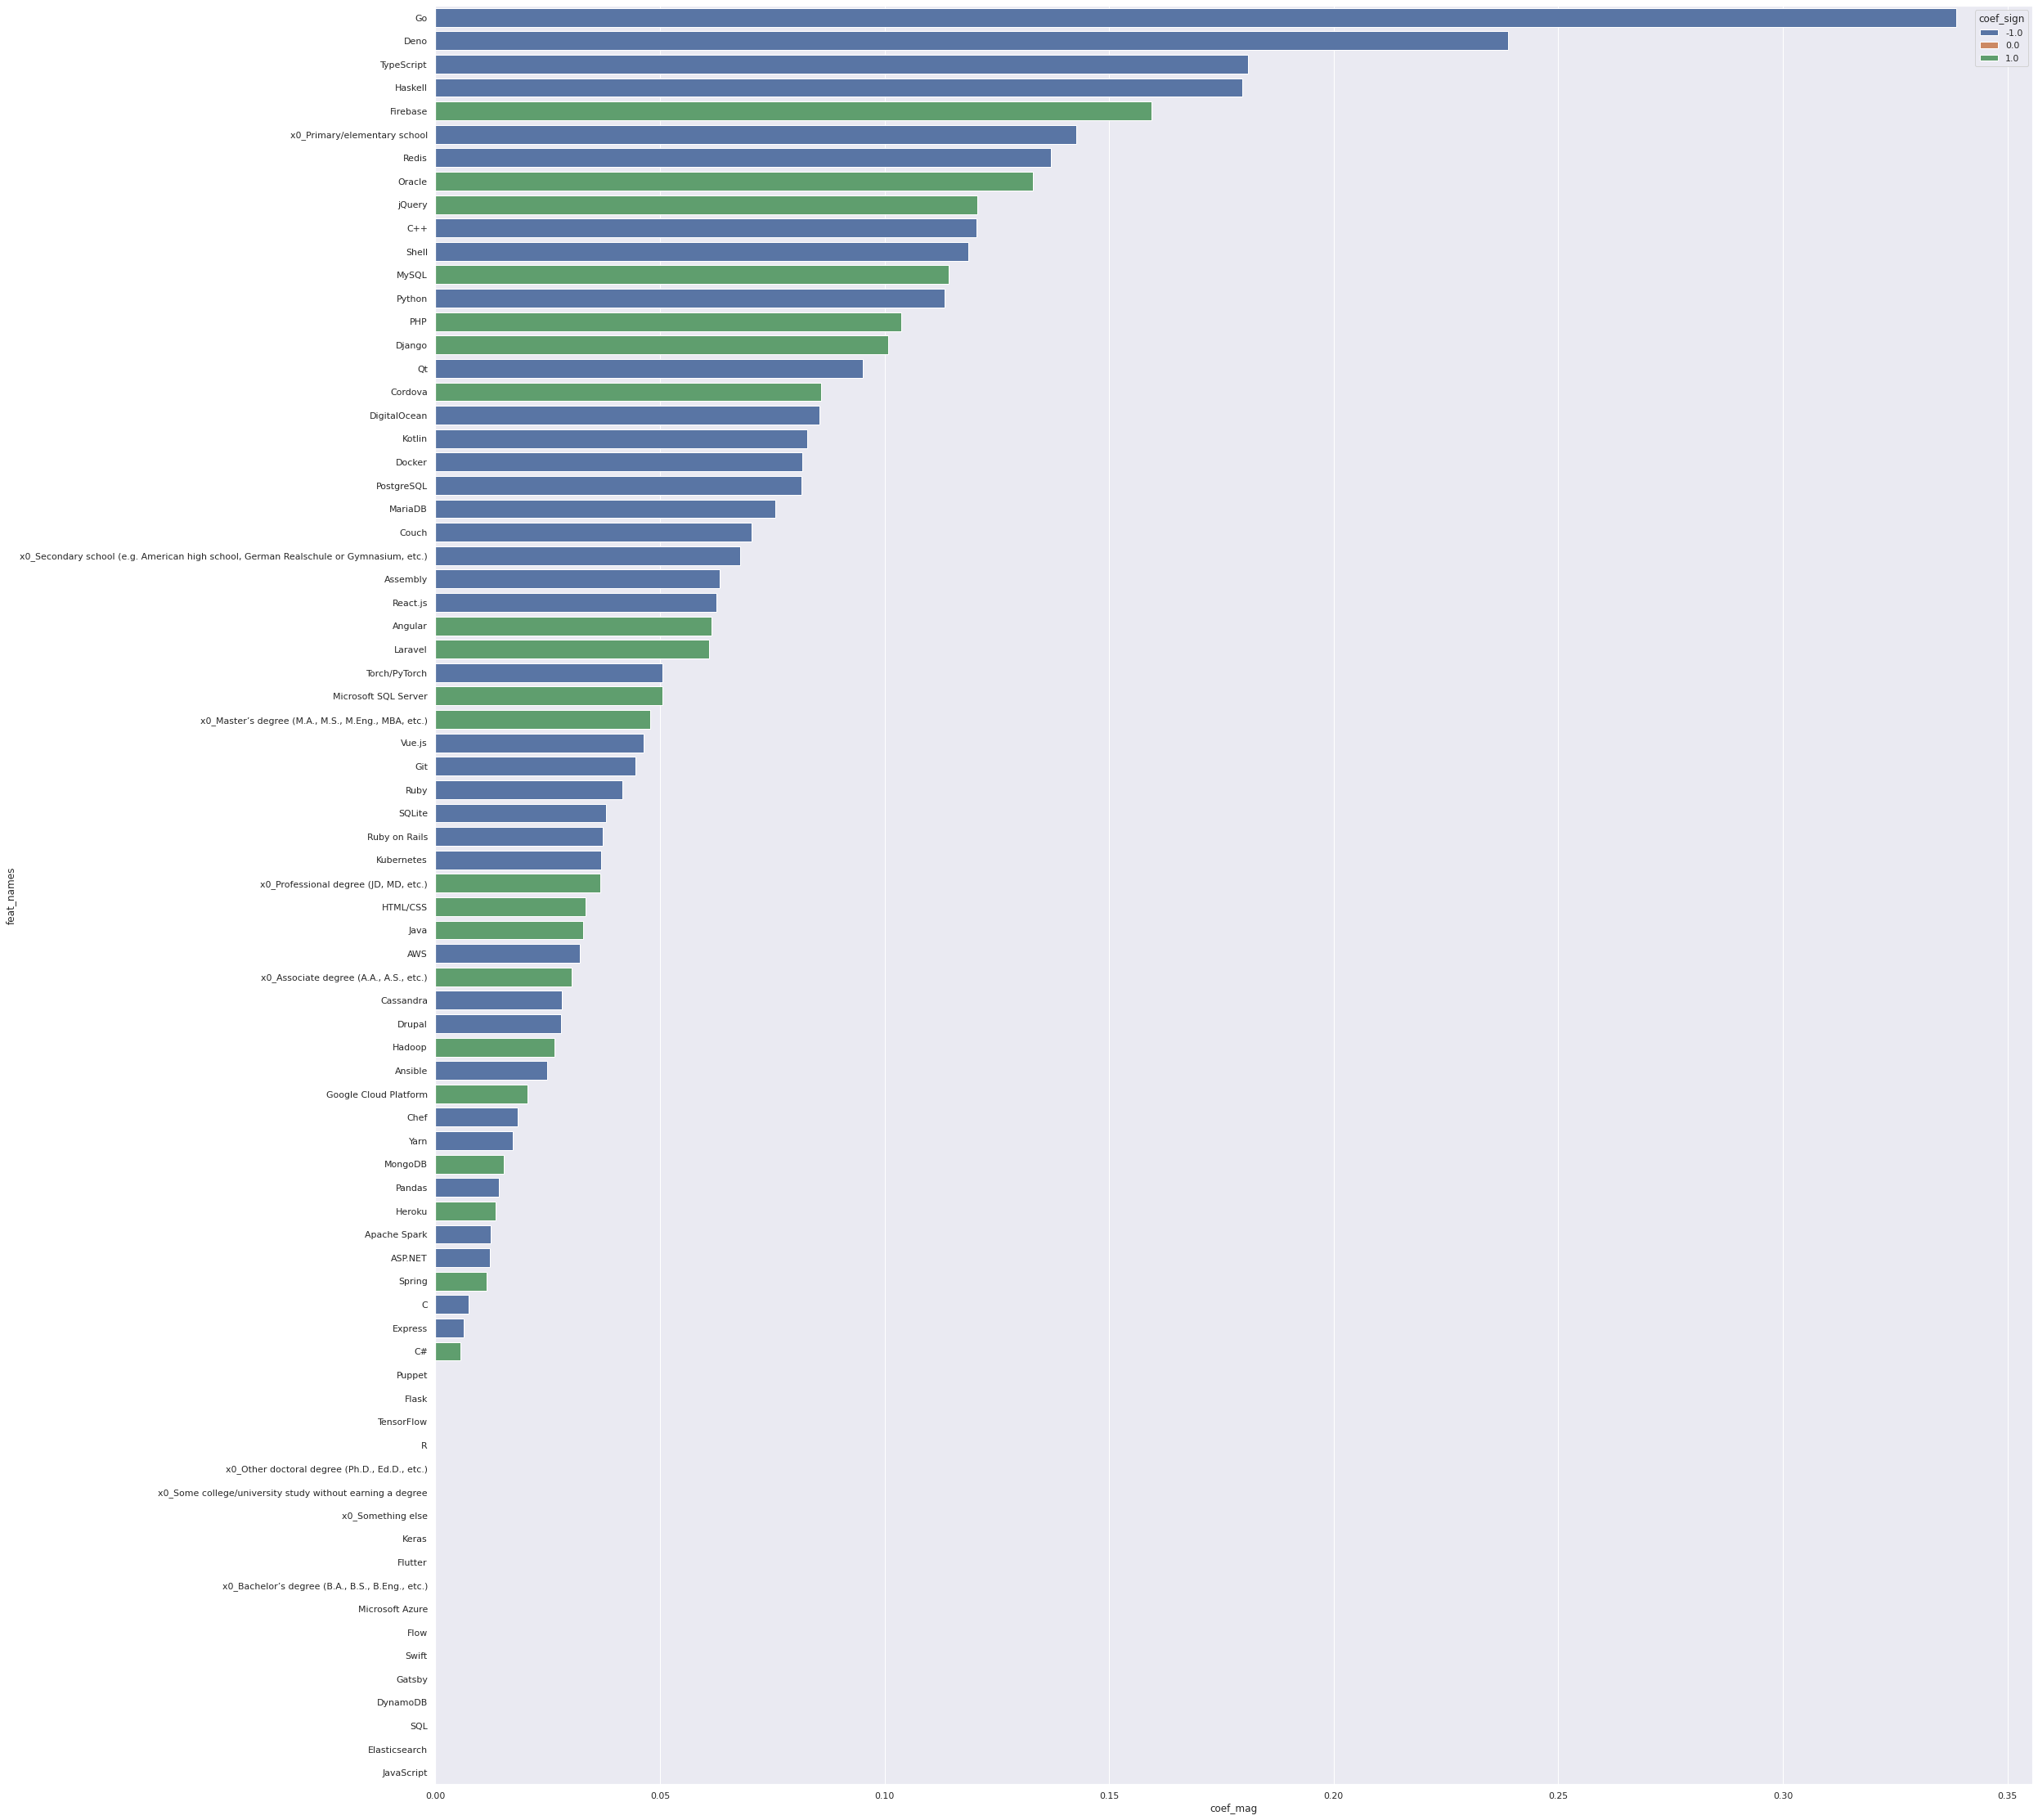

In [257]:
#get names in correct preproc order
cat_names = model.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names()
num_names = model.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

sns.set(rc = {'figure.figsize':(35,40)})

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

## Performance metrics on test data


Here, we can see the performance of the model, which is pretty nice! We can also look into different scores specifically for more insight into the performance.

In [258]:
print(classification_report(y_test, model.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2633
           1       0.42      0.11      0.17       519
           2       0.55      0.17      0.25       205

    accuracy                           0.79      3357
   macro avg       0.60      0.42      0.44      3357
weighted avg       0.74      0.79      0.74      3357



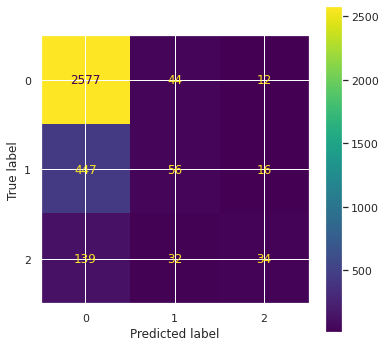

In [259]:
cm = confusion_matrix(y_test, model.best_estimator_.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)

sns.set(rc = {'figure.figsize':(6,6)})
disp.plot()

plt.show()

# Random Forest Classifier


In [260]:
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', RandomForestClassifier())
                       ])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1210>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1d10>)])),
                ('mdl', RandomForestClassifier())])

## Cross-validation with hyperparameter tuning


In [261]:
tuning_grid = { 
    'mdl__n_estimators': [20], 
    'mdl__max_features': ['auto', 'sqrt', 'log2'],
    'mdl__max_depth' : [2, 3],
    'mdl__criterion' :['gini', 'entropy']
}
model = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [262]:
tuning_grid

{'mdl__criterion': ['gini', 'entropy'],
 'mdl__max_depth': [2, 3],
 'mdl__max_features': ['auto', 'sqrt', 'log2'],
 'mdl__n_estimators': [20]}

In [263]:
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1210>),
                                                                        ('num_pipe',
                                                                    

In [264]:
print(model.best_score_)
model.best_params_

0.7854908893760462


{'mdl__criterion': 'gini',
 'mdl__max_depth': 3,
 'mdl__max_features': 'auto',
 'mdl__n_estimators': 20}

In [265]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__criterion,param_mdl__max_depth,param_mdl__max_features,param_mdl__n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.130614,0.005010,0.018592,0.000464,gini,2,auto,20,"{'mdl__criterion': 'gini', 'mdl__max_depth': 2...",0.784066,...,0.784225,0.000165,6,0.784264,0.784191,0.784191,0.784191,0.784285,0.784225,0.000041
1,0.123967,0.003528,0.019840,0.003467,gini,2,sqrt,20,"{'mdl__criterion': 'gini', 'mdl__max_depth': 2...",0.784066,...,0.784225,0.000165,6,0.784264,0.784191,0.784191,0.784191,0.784285,0.784225,0.000041
2,0.118463,0.004384,0.019057,0.000942,gini,2,log2,20,"{'mdl__criterion': 'gini', 'mdl__max_depth': 2...",0.784066,...,0.784225,0.000165,6,0.784264,0.784191,0.784191,0.784191,0.784285,0.784225,0.000041
3,0.142065,0.003557,0.018990,0.000377,gini,3,auto,20,"{'mdl__criterion': 'gini', 'mdl__max_depth': 3...",0.784810,...,0.785491,0.000505,1,0.785382,0.785495,0.785309,0.785681,0.785774,0.785528,0.000176
4,0.140147,0.006727,0.019019,0.000508,gini,3,sqrt,20,"{'mdl__criterion': 'gini', 'mdl__max_depth': 3...",0.784066,...,0.784225,0.000165,6,0.784264,0.784191,0.784191,0.784191,0.784285,0.784225,0.000041
5,0.133410,0.003925,0.019085,0.000990,gini,3,log2,20,"{'mdl__criterion': 'gini', 'mdl__max_depth': 3...",0.784810,...,0.784597,0.000308,4,0.785196,0.784191,0.784191,0.784191,0.785588,0.784672,0.000601
6,0.124861,0.004235,0.019503,0.001035,entropy,2,auto,20,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.784066,...,0.784225,0.000165,6,0.784264,0.784191,0.784191,0.784191,0.784285,0.784225,0.000041
7,0.124425,0.003459,0.018473,0.000366,entropy,2,sqrt,20,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.784066,...,0.784225,0.000165,6,0.784264,0.784191,0.784191,0.784191,0.784285,0.784225,0.000041
8,0.120849,0.005249,0.019449,0.002725,entropy,2,log2,20,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.784066,...,0.784225,0.000165,6,0.784264,0.784191,0.784191,0.784191,0.784285,0.784225,0.000041
9,0.138554,0.004686,0.018634,0.000247,entropy,3,auto,20,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.784810,...,0.785342,0.000590,2,0.785475,0.785309,0.785309,0.785402,0.785309,0.785360,0.000068


## Final Fit


In [266]:
model.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f1ee5d250>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                

## Variable Importance

In [267]:
model.classes_

array([0, 1, 2])

In [268]:
vip = model.best_estimator_['mdl'].feature_importances_
vip

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04200669, 0.        , 0.01701584, 0.00023467, 0.        ,
       0.        , 0.20451133, 0.0136074 , 0.02453717, 0.01134548,
       0.00387622, 0.        , 0.        , 0.        , 0.        ,
       0.02802456, 0.09243446, 0.        , 0.06650928, 0.        ,
       0.00067081, 0.        , 0.06782144, 0.        , 0.        ,
       0.00803412, 0.        , 0.        , 0.        , 0.01630011,
       0.        , 0.        , 0.        , 0.        , 0.00587481,
       0.00321181, 0.        , 0.0014909 , 0.0049258 , 0.        ,
       0.00643582, 0.00335486, 0.        , 0.        , 0.        ,
       0.        , 0.00805396, 0.00111737, 0.        , 0.04645491,
       0.01112681, 0.02338677, 0.01632496, 0.00085932, 0.15406974,
       0.00349447, 0.00253187, 0.013953  , 0.0173025 , 0.        ,
       0.00691234, 0.06543681, 0.00582668, 0.0009249 , 0.     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


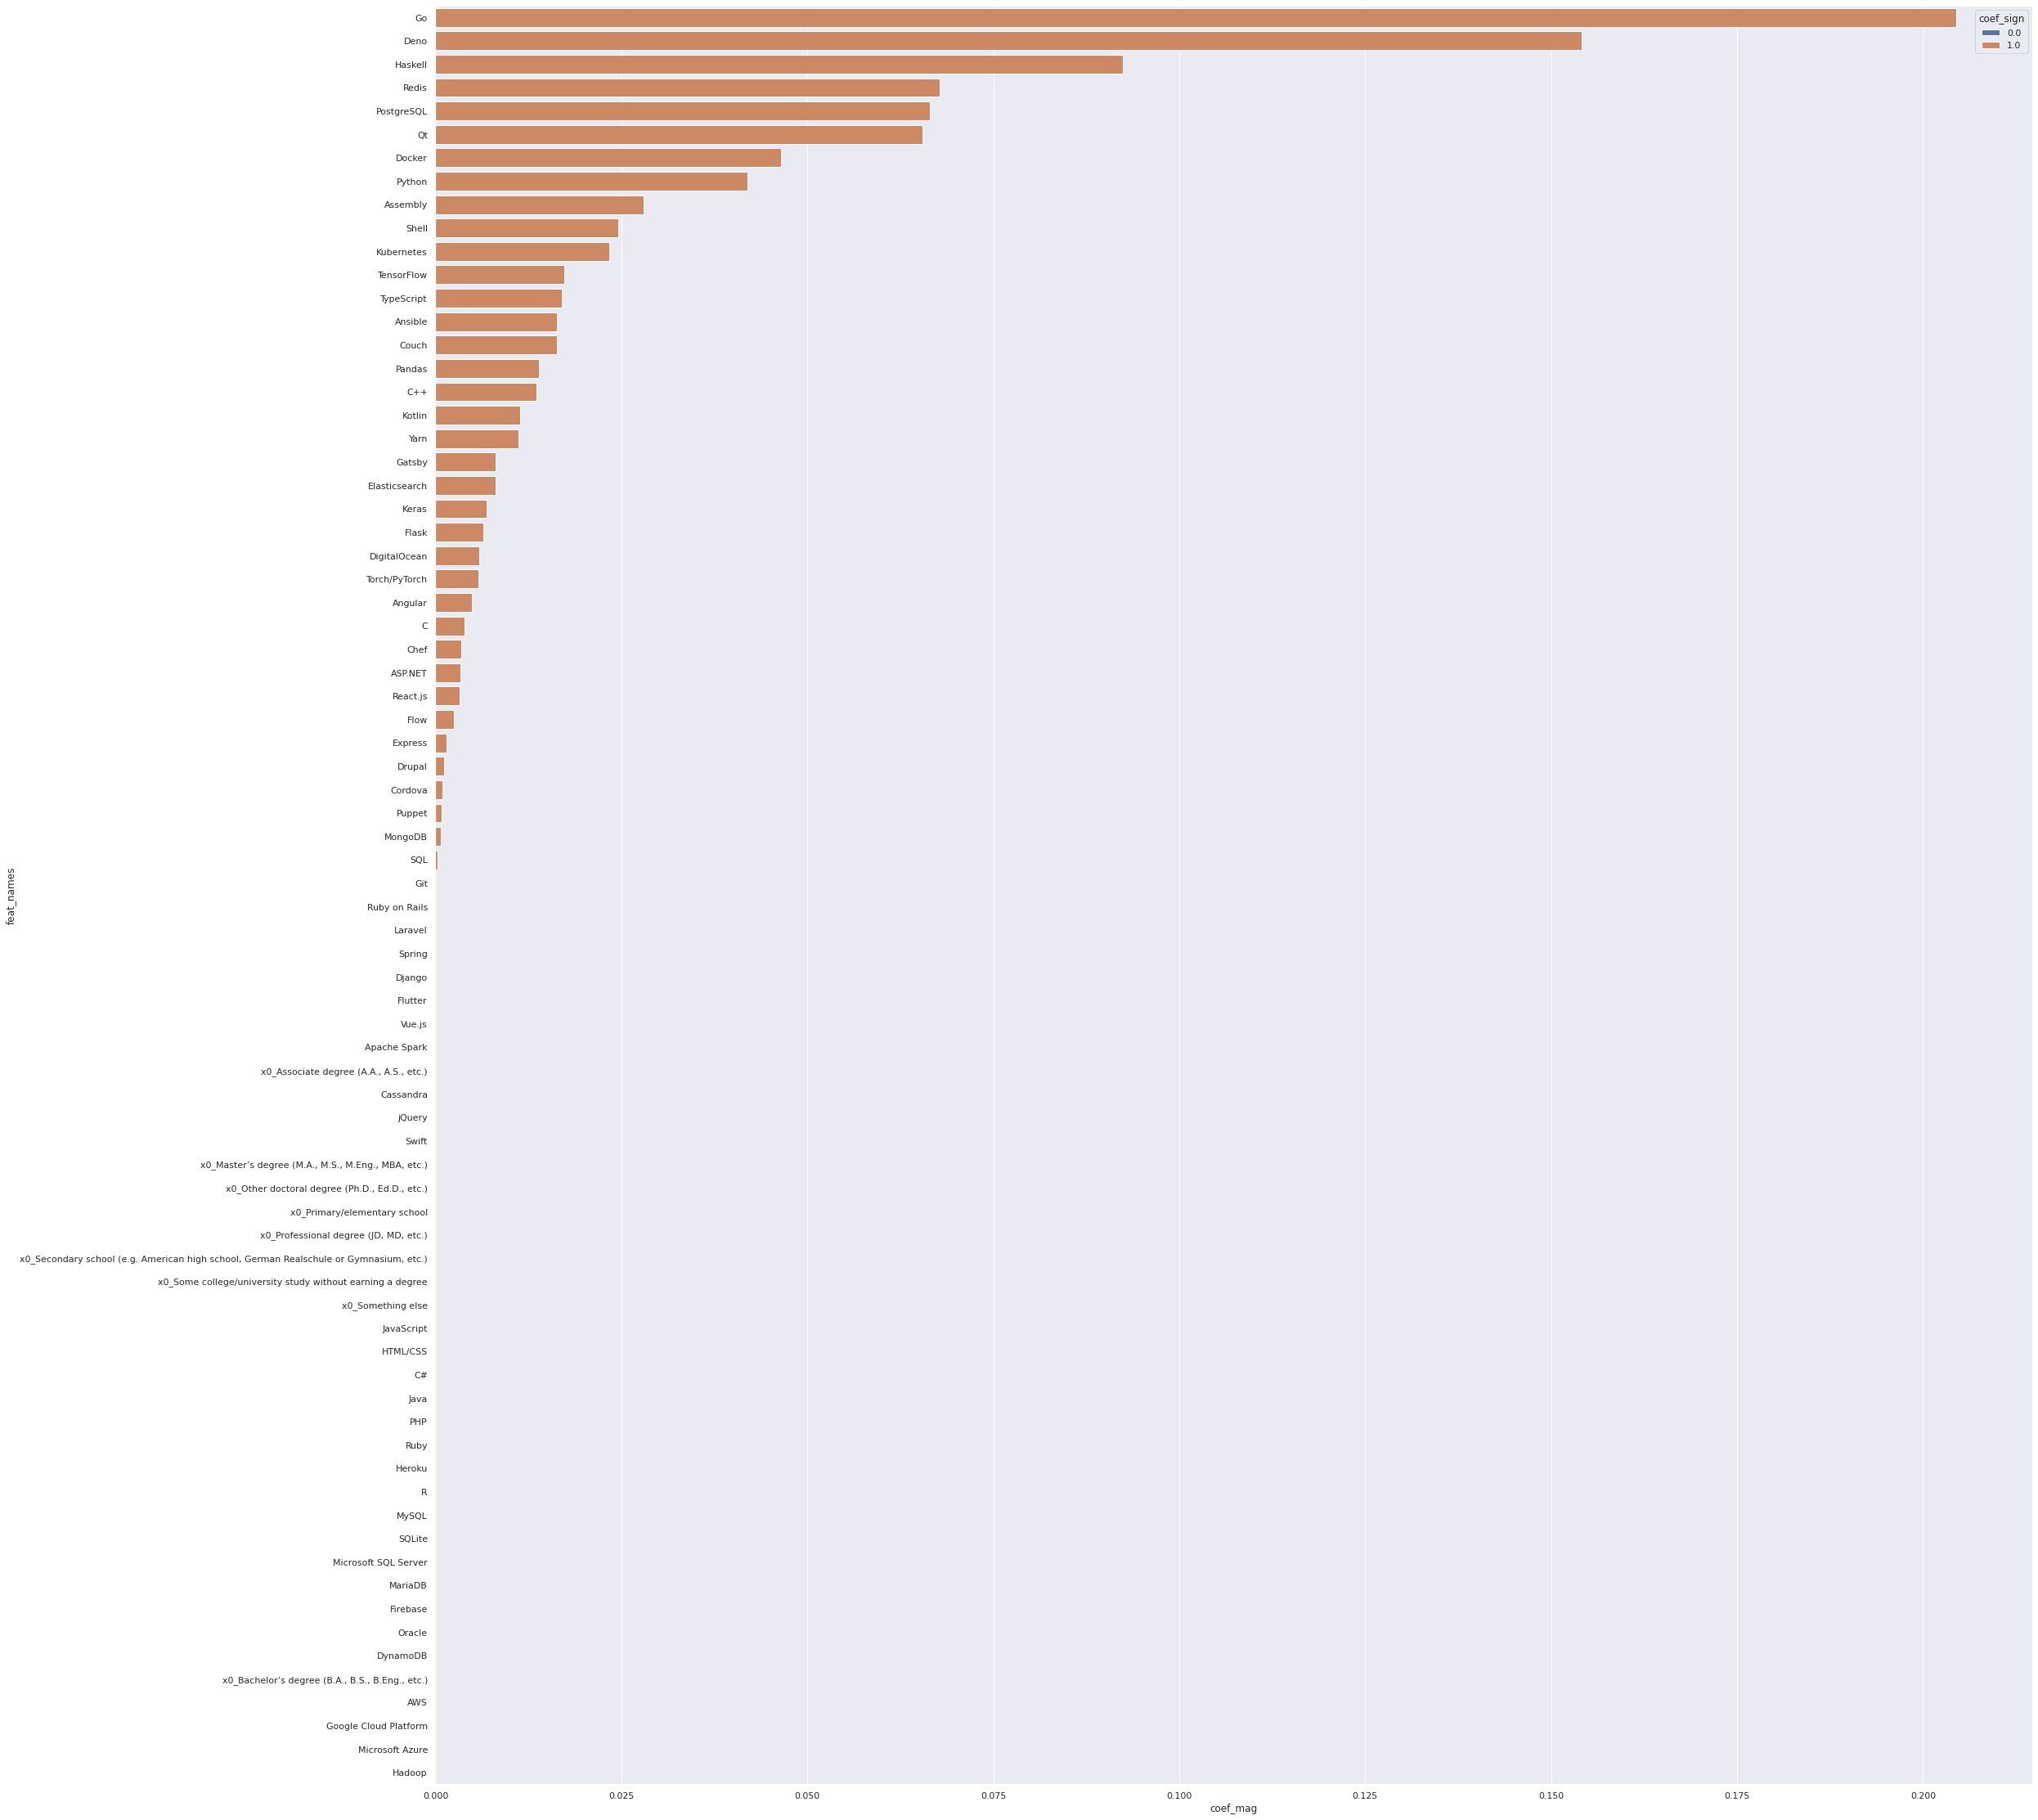

In [269]:
#get names in correct preproc order
cat_names = model.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names()
num_names = model.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

sns.set(rc = {'figure.figsize':(35,40)})

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

## Performance Metrics

In [270]:
print(classification_report(y_test, model.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2633
           1       0.00      0.00      0.00       519
           2       1.00      0.02      0.04       205

    accuracy                           0.79      3357
   macro avg       0.60      0.34      0.31      3357
weighted avg       0.68      0.79      0.69      3357



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


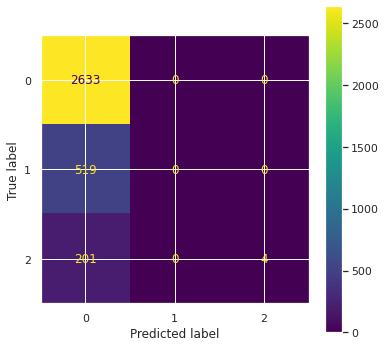

In [271]:
cm = confusion_matrix(y_test, model.best_estimator_.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)

sns.set(rc = {'figure.figsize':(6,6)})

disp.plot()

plt.show()

# Gradient Boost Classifier

In [272]:
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', GradientBoostingClassifier())])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1210>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1d10>)])),
                ('mdl', GradientBoostingClassifier())])

## Cross-validation with hyperparameter tuning

In [273]:
tuning_grid = { 
    'mdl__n_estimators': [20], 
    'mdl__max_features': ['auto', 'sqrt', 'log2'],
    'mdl__max_depth' : [2, 3]
}
model = GridSearchCV(pipe, 
                    param_grid = tuning_grid, 
                    cv = 5, 
                    return_train_score=True)

In [274]:
tuning_grid

{'mdl__max_depth': [2, 3],
 'mdl__max_features': ['auto', 'sqrt', 'log2'],
 'mdl__n_estimators': [20]}

In [275]:
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f2d4b1210>),
                                                                        ('num_pipe',
                                                                    

In [276]:
print(model.best_score_)
model.best_params_

0.7910024944848175


{'mdl__max_depth': 3, 'mdl__max_features': 'auto', 'mdl__n_estimators': 20}

In [277]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__max_depth,param_mdl__max_features,param_mdl__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.334704,0.027110,0.016588,0.001177,2,auto,20,"{'mdl__max_depth': 2, 'mdl__max_features': 'au...",0.791139,0.786965,...,0.789885,0.001528,2,0.790503,0.791267,0.789871,0.790057,0.790522,0.790444,0.000483
1,0.432535,0.006018,0.016441,0.001485,2,sqrt,20,"{'mdl__max_depth': 2, 'mdl__max_features': 'sq...",0.787789,0.785475,...,0.787576,0.001305,5,0.787058,0.789219,0.788288,0.787543,0.788009,0.788023,0.000730
2,0.419232,0.010966,0.017163,0.001327,2,log2,20,"{'mdl__max_depth': 2, 'mdl__max_features': 'lo...",0.786299,0.786592,...,0.787055,0.000848,6,0.787244,0.787822,0.786984,0.786519,0.787543,0.787223,0.000450
3,1.821624,0.004868,0.017190,0.001153,3,auto,20,"{'mdl__max_depth': 3, 'mdl__max_features': 'au...",0.791512,0.789572,...,0.791002,0.001367,1,0.797952,0.796760,0.797691,0.794433,0.795084,0.796384,0.001400
4,0.524361,0.013006,0.016824,0.000458,3,sqrt,20,"{'mdl__max_depth': 3, 'mdl__max_features': 'sq...",0.789278,0.789199,...,0.789289,0.001340,3,0.790875,0.791267,0.791640,0.790802,0.789964,0.790909,0.000560
5,0.465860,0.005090,0.016547,0.000246,3,log2,20,"{'mdl__max_depth': 3, 'mdl__max_features': 'lo...",0.788905,0.786220,...,0.788619,0.001218,4,0.791434,0.790615,0.789312,0.789684,0.789312,0.790072,0.000831


## Final Fit

In [278]:
model.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f242a9f50>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                

## Variable Importance

In [279]:
model.classes_

array([0, 1, 2])

In [280]:
vip = model.best_estimator_['mdl'].feature_importances_
vip

array([0.00000000e+00, 2.45956127e-03, 4.52481108e-04, 1.04691435e-03,
       9.59535709e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.11285035e-04, 1.64731300e-02, 0.00000000e+00,
       2.02740967e-02, 2.57109638e-03, 0.00000000e+00, 5.74469468e-04,
       3.98639875e-01, 6.96263867e-03, 2.64810830e-02, 2.92550358e-03,
       1.18909376e-02, 3.66850771e-03, 5.64173611e-04, 1.08898215e-02,
       1.86443880e-03, 8.43746862e-03, 1.32080868e-01, 2.06477326e-02,
       3.14601683e-02, 0.00000000e+00, 0.00000000e+00, 2.45257942e-03,
       2.58275717e-02, 0.00000000e+00, 3.17795396e-03, 7.41879527e-04,
       1.36777265e-02, 6.01441418e-04, 0.00000000e+00, 5.33995186e-03,
       7.99589886e-04, 9.31780375e-04, 0.00000000e+00, 0.00000000e+00,
       5.12717453e-03, 1.24930122e-03, 1.15134562e-02, 7.16864542e-04,
       1.00712451e-02, 0.00000000e+00, 1.85138208e-03, 0.00000000e+00,
       8.24160809e-04, 0.00000000e+00, 1.41274664e-03, 0.00000000e+00,
      

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


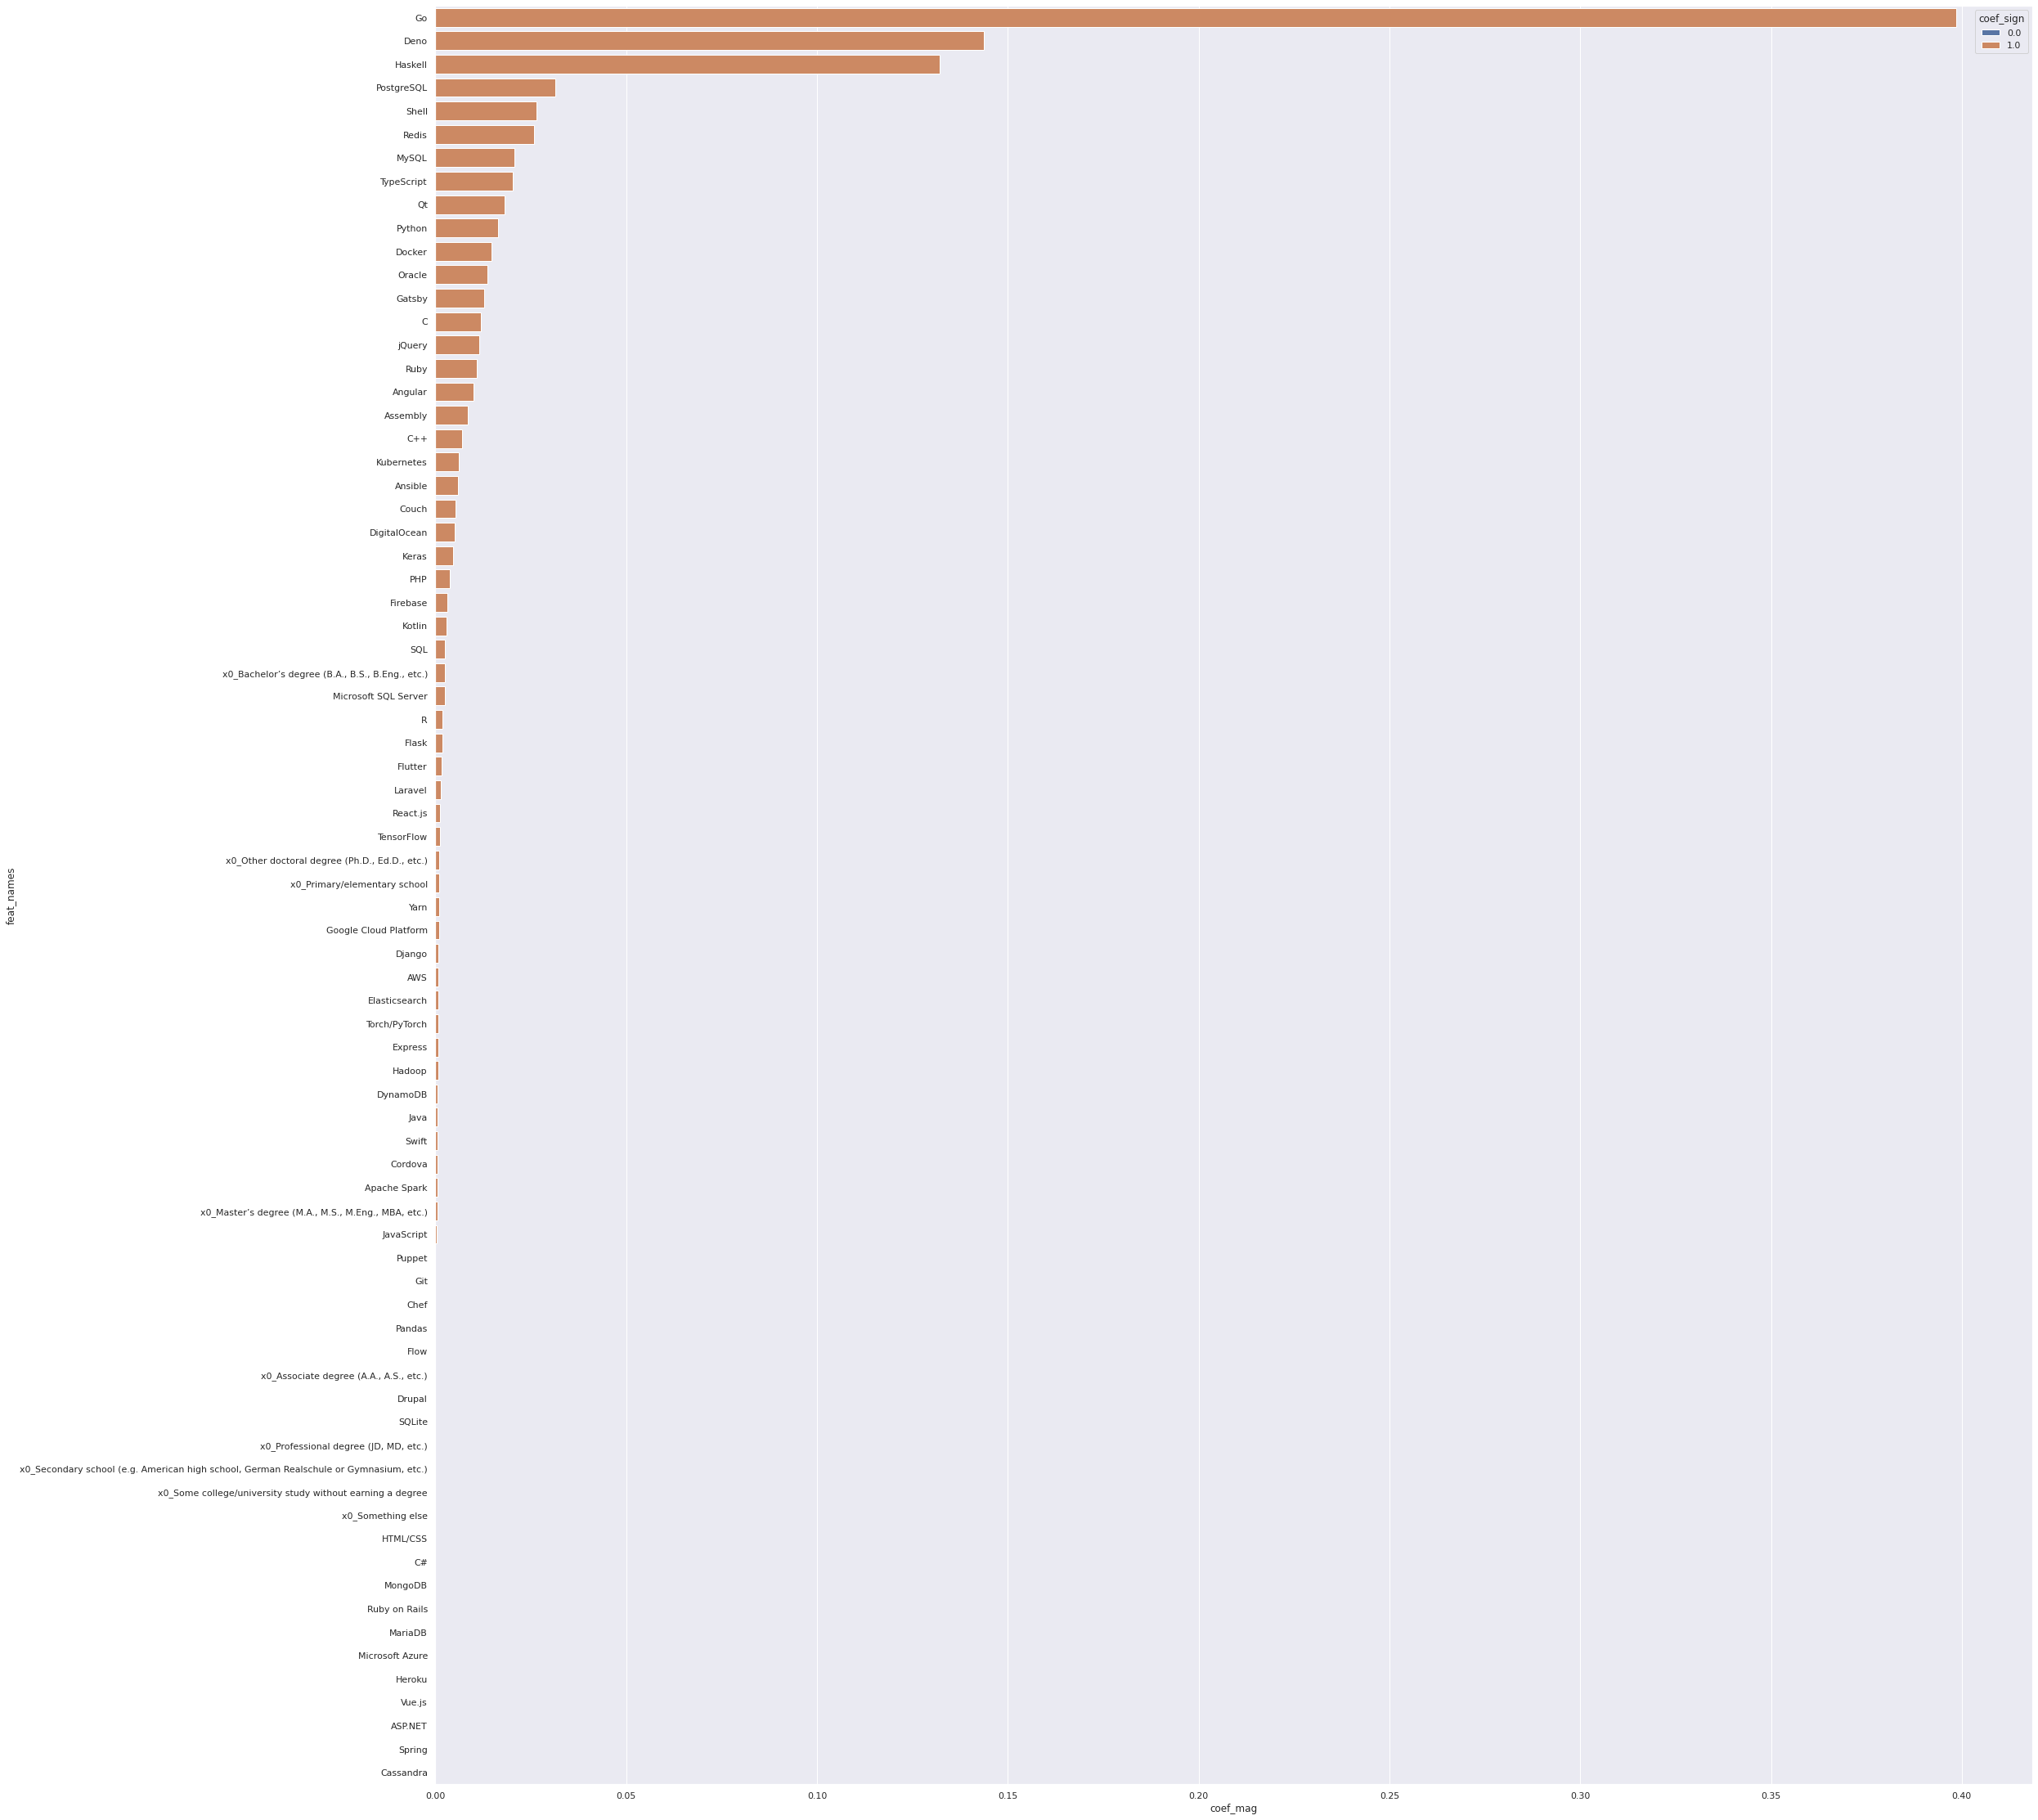

In [281]:
#get names in correct preproc order
cat_names = model.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names()
num_names = model.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

sns.set(rc = {'figure.figsize':(35,40)})

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

## Performance Metrics

In [282]:
print(classification_report(y_test, model.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2633
           1       0.50      0.03      0.05       519
           2       0.50      0.06      0.10       205

    accuracy                           0.79      3357
   macro avg       0.60      0.36      0.35      3357
weighted avg       0.73      0.79      0.71      3357



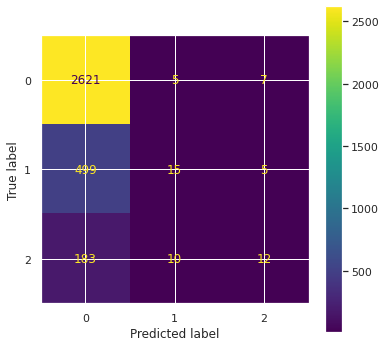

In [283]:
cm = confusion_matrix(y_test, model.best_estimator_.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)

sns.set(rc = {'figure.figsize':(6,6)})
disp.plot()

plt.show()

## Exploring the ROC curve

In [284]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [285]:
y_pred = model.predict_proba(x_test)
# keep probabilities for the positive outcome (class 1) only
# classes are ordered so class 1 is at col index 1
y_pred = y_pred[:, 1]

#convert M/F classification into 0,1 Binary format
#y_true = [1 if y=="male" else 0 for y in y_test]

In [289]:
# get roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=True)

In [290]:
# calculate (benefit - cost) for each threshold
net_gain = tpr - fpr

# locate the index of the largest net_gain
ix = np.argmax(net_gain)
print('Best Threshold=%f, Net Gain=%.3f' % (thresholds[ix], net_gain[ix]))

Best Threshold=0.135540, Net Gain=0.367


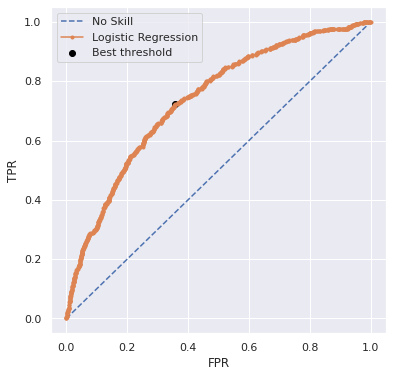

In [291]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')

# axis labels
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.legend()

pyplot.show()

# lr.fit(df.iloc[:, :5], df['actual_y'])

In [292]:
cm = pd.DataFrame()
cm['tpr'] = tpr
cm['fpr'] = fpr
cm['thresholds'] = thresholds
cm['tpr-fpr'] = tpr - fpr

 Reward of X for correct predictions, and -Y for false


In [293]:
cm['value'] = cm['tpr'] * 10 - cm['fpr'] * 100
cm.sort_values('value', ascending=False).iloc[0, 2]

0.5472230945016293